# **Introduction**

## Context
A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers‚Äô booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:

1.   Loss of resources (revenue) when the hotel cannot resell the room.
2.   Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

ùêÉùêöùê≠ùêö ùêÉùê¢ùêúùê≠ùê¢ùê®ùêßùêöùê´ùê≤

1. Booking_ID: the unique identifier of each booking
2. no_of_adults: Number of adults
3. no_of_children: Number of Children
4. no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
5. no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
6. type_of_meal_plan: Type of meal plan booked by the customer:
7. Not Selected ‚Äì No meal plan selected
8. Meal Plan 1 ‚Äì Breakfast
9. Meal Plan 2 ‚Äì Half board (breakfast and one other meal)
10. Meal Plan 3 ‚Äì Full board (breakfast, lunch, and dinner)
11. required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
12. room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
13. lead_time: Number of days between the date of booking and the arrival date
14. arrival_year: Year of arrival date
15. arrival_month: Month of arrival date
16. arrival_date: Date of the month
17. market_segment_type: Market segment designation.
18. repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
19. no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
20. no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
21. avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
22. no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
23. booking_status: Flag indicating if the booking was canceled or not.

**Objective:**
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

# **Import Necessary Libraries**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Python Stats Libraries

In [3]:
import scipy
import statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Prediction Libraries for Python

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# **Data Overview**


INN Hotels Group, a chain of hotels in Portugal, is experiencing a high volume of booking cancellations. This is causing significant revenue loss due to unoccupied rooms, increased distribution costs, the need for last-minute price reductions, and the burden on staff to manage cancellations and refunds.

**The goal of this project is to leverage machine learning to:**

* Identify the key factors that influence booking cancellations.

* Develop a predictive model to identify high-risk bookings that are likely to be canceled.

* Provide data-driven recommendations to INN Hotels on how to implement profitable policies for cancellations and refunds to mitigate revenue loss.

In [18]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/INNHotelsGroup.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [7]:
df.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

In [8]:
np.random.seed(1)
df.sample(n=25)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
30392   INN30393             1               0                     1   
6685    INN06686             2               0                     1   
8369    INN08370             2               0                     2   
2055    INN02056             2               0                     0   
10969   INN10970             1               0                     2   
24881   INN24882             2               0                     3   
28658   INN28659             2               0                     0   
20853   INN20854             2               0                     1   
8501    INN08502             2               0                     0   
1942    INN01943             2               0                     0   
15648   INN15649             2               0                     2   
6116    INN06117             2               0                     0   
7868    INN07869             2               0                     2   
24527   INN24528             2               0                     0   
24227   INN24228             2               0                     1   
17216   INN17217             2               0                     0   
31124   INN31125             1               0                     0   
9101    INN09102             1               0                     2   
9474    INN09475             2               0                     0   
12782   INN12783             2               0                     0   
28297   INN28298             1               0                     2   
22021   INN22022             2               0                     0   
26586   INN26587             3               0                     2   
16756   INN16757             2               0                     1   
20927   INN20928             2               0                     2   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
30392                  0      Not Selected                           0   
6685                   2       Meal Plan 1                           0   
8369                   3       Meal Plan 1                           0   
2055                   2      Not Selected                           0   
10969                  4       Meal Plan 1                           0   
24881                  7       Meal Plan 1                           0   
28658                  3       Meal Plan 2                           0   
20853                  2       Meal Plan 1                           0   
8501                   3       Meal Plan 1                           0   
1942                   2       Meal Plan 1                           0   
15648                  4       Meal Plan 1                           0   
6116                   1       Meal Plan 1                           0   
7868                   4       Meal Plan 1                           0   
24527                  3       Meal Plan 1                           0   
24227                  0       Meal Plan 1                           0   
17216                  1       Meal Plan 1                           0   
31124                  1       Meal Plan 1                           0   
9101                   1       Meal Plan 1                           0   
9474                   2       Meal Plan 2                           0   
12782                  3      Not Selected                           0   
28297                  5       Meal Plan 1                           0   
22021                  2       Meal Plan 1                           0   
26586                  2       Meal Plan 1                           0   
16756                  2       Meal Plan 1                           0   
20927                  6       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
30392        Room_Type 1         53          2018              9   
6685         Room_Type 1         63          2018              4   
8369

In [9]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0



> 1. Average Guest Profile: Bookings typically involve 2 adults and rarely include children. Stays average roughly 3 nights, with a slight skew towards weeknights.
2. Booking Lead Time: Guests book well in advance (85 days on average), indicating a need for long-term demand forecasting.
3. Repeat Business: Repeat guests are infrequent (2.5%), suggesting opportunities to improve customer loyalty programs or targeted marketing.
4. Cancellations: Previous cancellations are uncommon, implying generally reliable booking confirmations.
5. Pricing Dynamics: Average room prices are around 103 euros, but with significant variation, highlighting the potential impact of dynamic pricing strategies.
6. Special Requests: Guests make relatively few special requests (average of 0.6), but accommodating these could improve satisfaction.




In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [20]:
df.shape

(36275, 19)



> The dataframe df has 36275 entries and 19 columns with no missing values. Data types include integers, floats, and strings. Column names are descriptive. The data is ready for analysis.



In [21]:
df[df.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [22]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [24]:
print(df.describe(include='object').T)

                     count unique           top   freq
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390


In [23]:
df = df.drop('Booking_ID', axis=1)

In [15]:
df.shape

(36275, 18)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [25]:
df['required_car_parking_space'] = df['required_car_parking_space'].replace({1: 'yes', 0: 'no'})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [27]:
cat_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status', 'required_car_parking_space']
for col in cat_columns:
    print(f"Value counts for column: \033[1m{col}\033[0m")  # Bold the column name
    value_counts = (df[col].value_counts(normalize=True) * 100).apply(lambda x: f"{x:.2f}%")
    # Use a more readable format for displaying value counts
    for value, percentage in value_counts.items():
      print(f"{value:<30}: {percentage}")  # Left-align value and add spacing
    print("-" * 50)

Value counts for column: type_of_meal_plan
Meal Plan 1                   : 76.73%
Not Selected                  : 14.14%
Meal Plan 2                   : 9.11%
Meal Plan 3                   : 0.01%
--------------------------------------------------
Value counts for column: room_type_reserved
Room_Type 1                   : 77.55%
Room_Type 4                   : 16.70%
Room_Type 6                   : 2.66%
Room_Type 2                   : 1.91%
Room_Type 5                   : 0.73%
Room_Type 7                   : 0.44%
Room_Type 3                   : 0.02%
--------------------------------------------------
Value counts for column: market_segment_type
Online                        : 63.99%
Offline                       : 29.02%
Corporate                     : 5.56%
Complementary                 : 1.08%
Aviation                      : 0.34%
--------------------------------------------------
Value counts for column: booking_status
Not_Canceled                  : 67.24%
Canceled              

In [37]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                         no        Room_Type 1        224   
1      Not Selected                         no        Room_Type 1          5   
2       Meal Plan 1                         no        Room_Type 1          1   
3       Meal Plan 1                         no        Room_Type 1        211   
4      Not Selected                         no        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [29]:
np.random.seed(1)
df.sample(n=10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
30392             1               0                     1                  0   
6685              2               0                     1                  2   
8369              2               0                     2                  3   
2055              2               0                     0                  2   
10969             1               0                     2                  4   
24881             2               0                     3                  7   
28658             2               0                     0                  3   
20853             2               0                     1                  2   
8501              2               0                     0                  3   
1942              2               0                     0                  2   

      type_of_meal_plan required_car_parking_space room_type_reserved  \
30392      Not Selected                         no        Room_Type 1   
6685        Meal Plan 1                         no        Room_Type 1   
8369        Meal Plan 1                         no        Room_Type 4   
2055       Not Selected                         no        Room_Type 1   
10969       Meal Plan 1                         no        Room_Type 1   
24881       Meal Plan 1                         no        Room_Type 2   
28658       Meal Plan 2                         no        Room_Type 1   
20853       Meal Plan 1                         no        Room_Type 1   
8501        Meal Plan 1                         no        Room_Type 2   
1942        Meal Plan 1                         no        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
30392         53          2018              9            11   
6685          63          2018              4            22   
8369          55          2018              9            11   
2055          53          2017             12            29   
10969        245          2018              7             6   
24881        231          2018              8             1   
28658         71          2018              5            10   
20853         66          2017             10             9   
8501          40          2018              1            14   
1942          63          2018              8             9   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
30392              Online               0                             0   
6685               Online               0                             0   
8369               Online               0                             0   
2055               Online               0                             0   
10969             Offline               0                             0   
24881              Online               0                             0   
28658             Offline               0                             0   
20853             Offline               0                             0   
8501               Online               0                             0   
1942               Online               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
30392                                     0               94.32   
6685                                      0              105.30   
8369                                      0              106.24   
2055                                      0               81.00   
10969                                     0              110.00   
24881                                     0               81.82   
28658                                     0              126.00   
20853                                     0               75.00   
8501                                      0               77.55   
1942                                      0              144.90   

       no_of_special_requests booking_status  
30392            

# **Exploratory Data Analysis (EDA)**

## Univariate Analysis

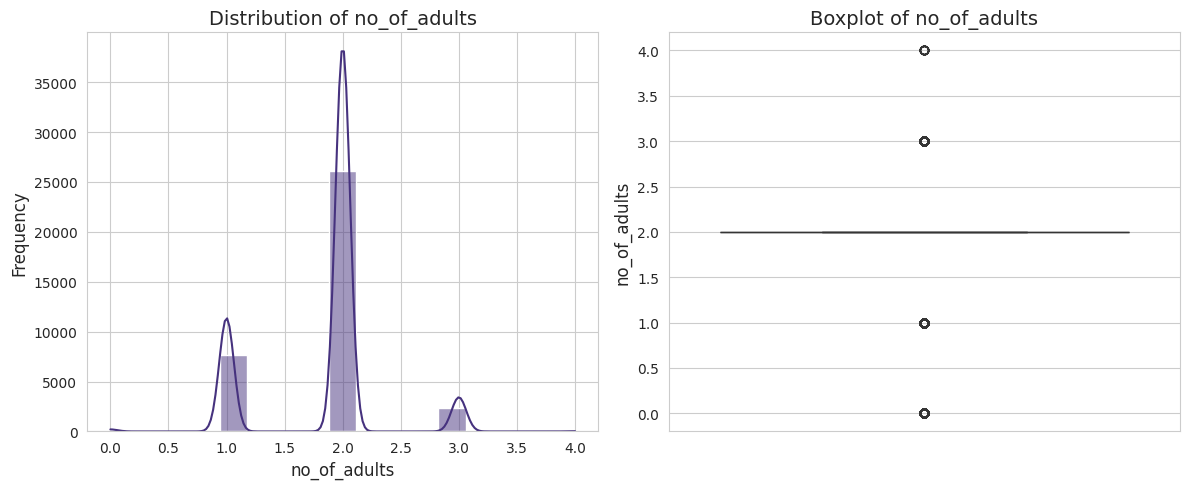

count    36275.000000
mean         1.844962
std          0.518715
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: no_of_adults, dtype: float64




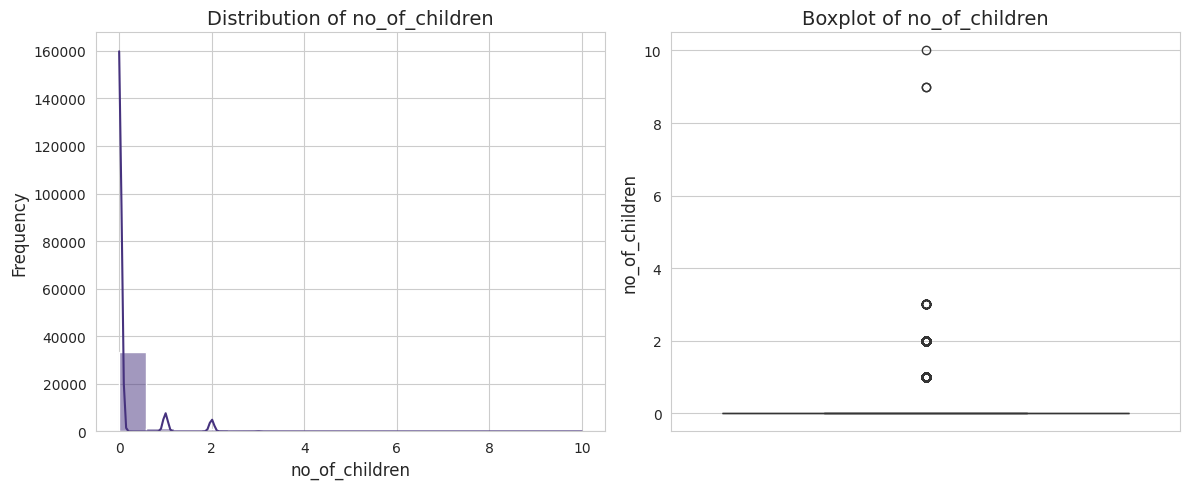

count    36275.000000
mean         0.105279
std          0.402648
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: no_of_children, dtype: float64




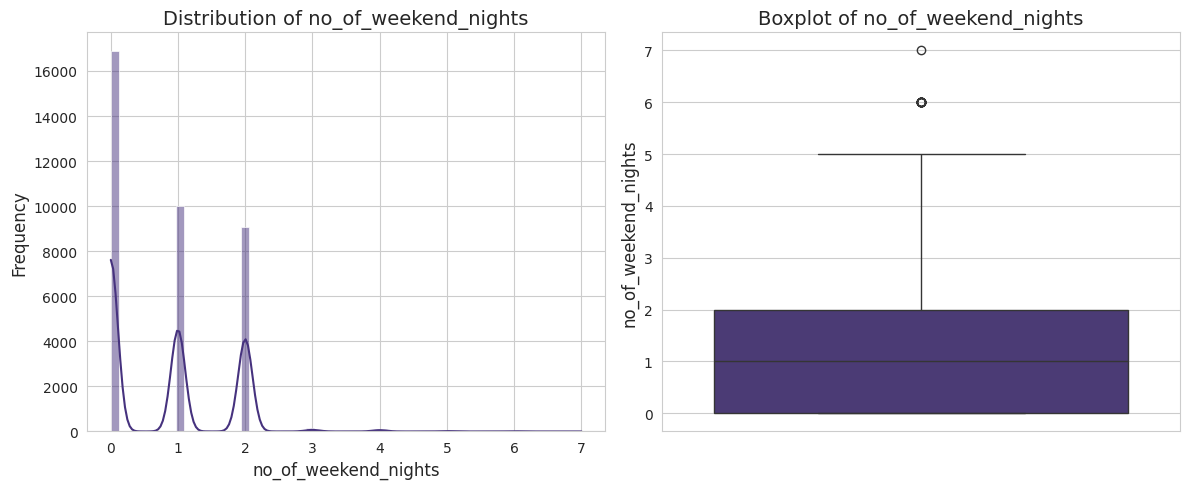

count    36275.000000
mean         0.810724
std          0.870644
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: no_of_weekend_nights, dtype: float64




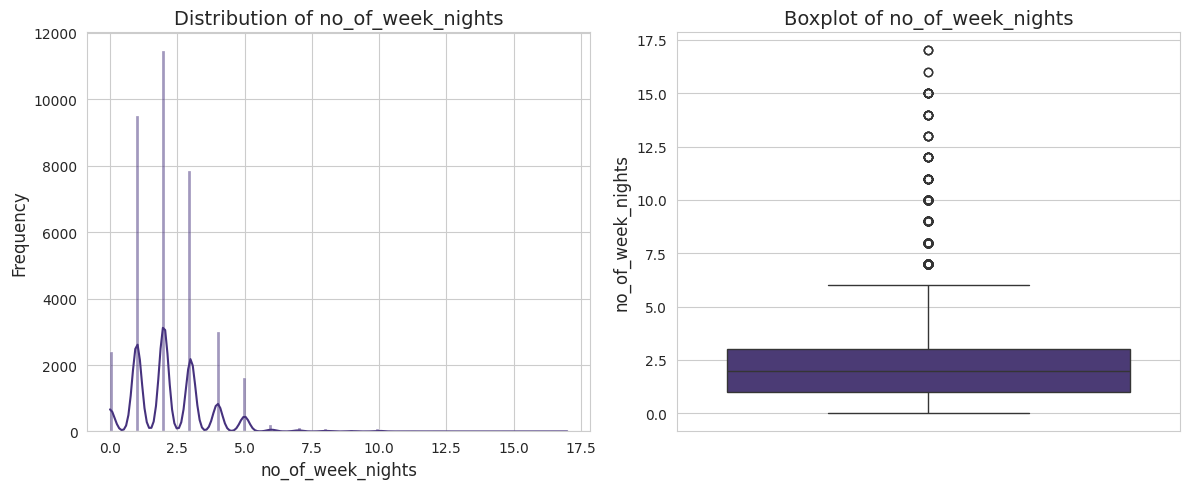

count    36275.000000
mean         2.204300
std          1.410905
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: no_of_week_nights, dtype: float64




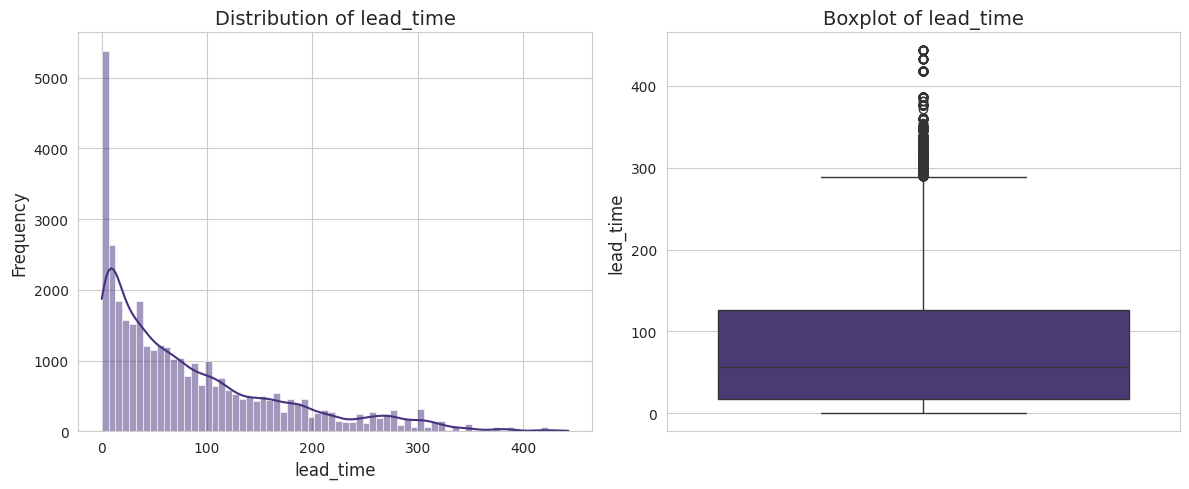

count    36275.000000
mean        85.232557
std         85.930817
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead_time, dtype: float64




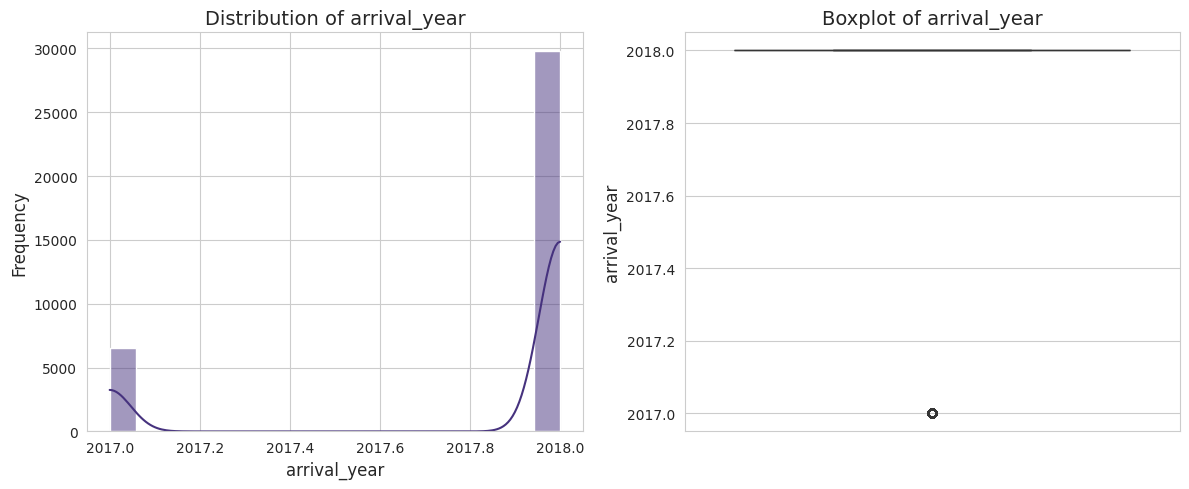

count    36275.000000
mean      2017.820427
std          0.383836
min       2017.000000
25%       2018.000000
50%       2018.000000
75%       2018.000000
max       2018.000000
Name: arrival_year, dtype: float64




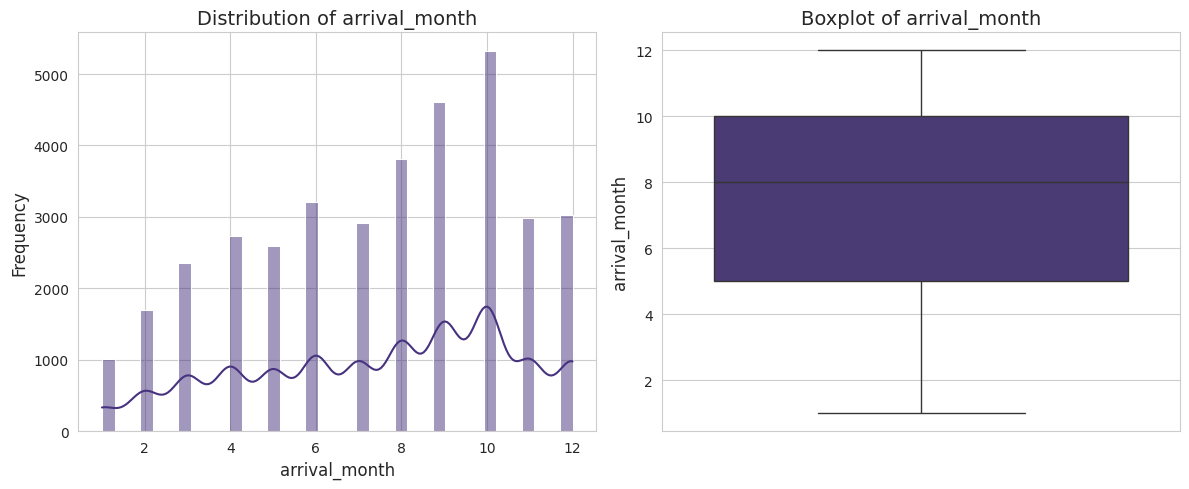

count    36275.000000
mean         7.423653
std          3.069894
min          1.000000
25%          5.000000
50%          8.000000
75%         10.000000
max         12.000000
Name: arrival_month, dtype: float64




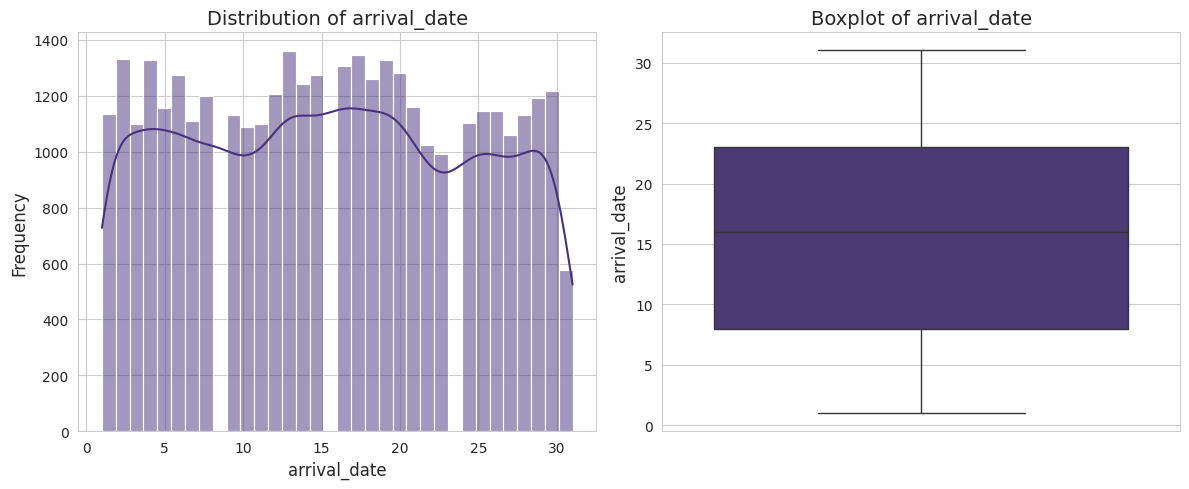

count    36275.000000
mean        15.596995
std          8.740447
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: arrival_date, dtype: float64




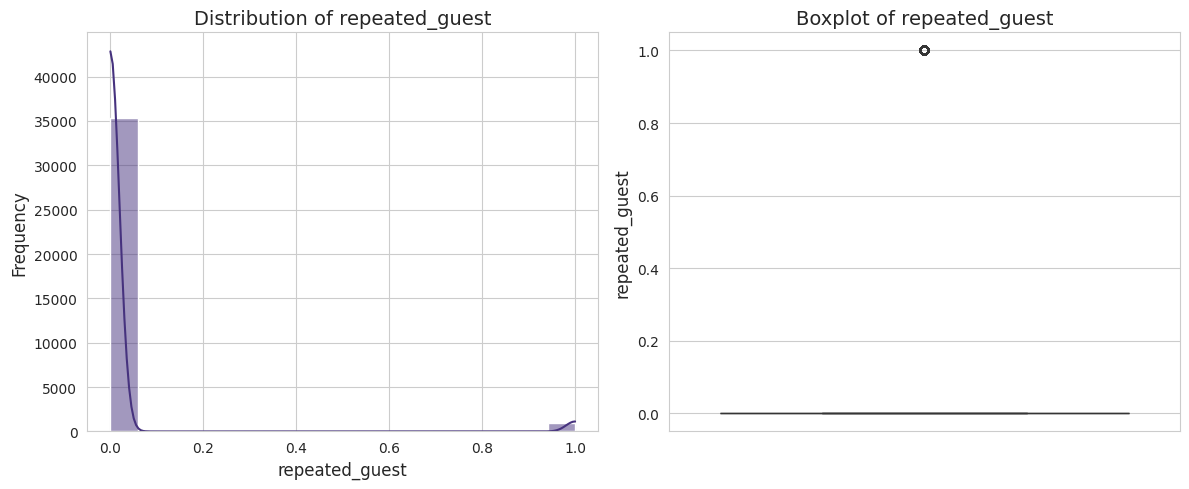

count    36275.000000
mean         0.025637
std          0.158053
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: repeated_guest, dtype: float64




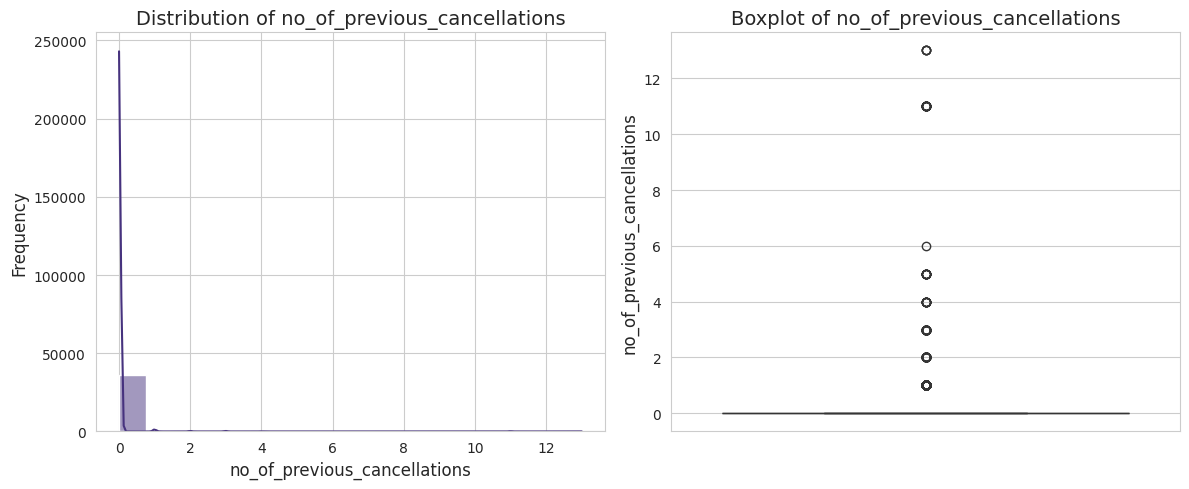

count    36275.000000
mean         0.023349
std          0.368331
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: no_of_previous_cancellations, dtype: float64




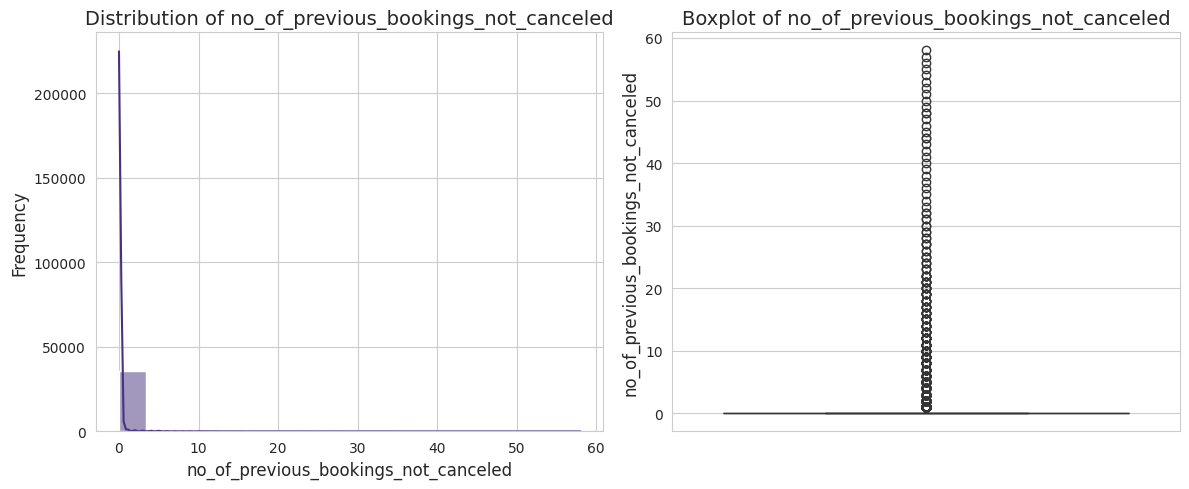

count    36275.000000
mean         0.153411
std          1.754171
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: no_of_previous_bookings_not_canceled, dtype: float64




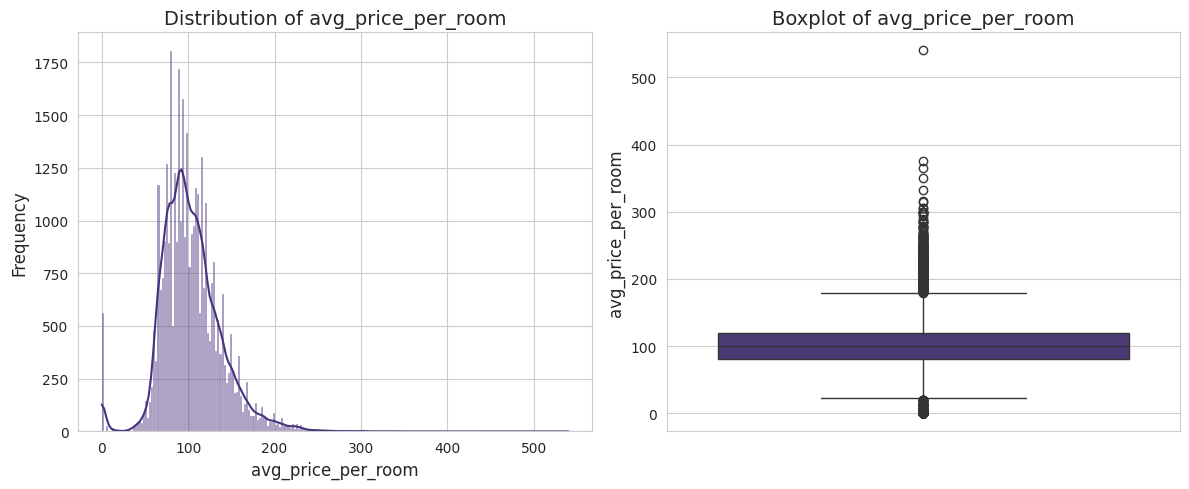

count    36275.000000
mean       103.423539
std         35.089424
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: avg_price_per_room, dtype: float64




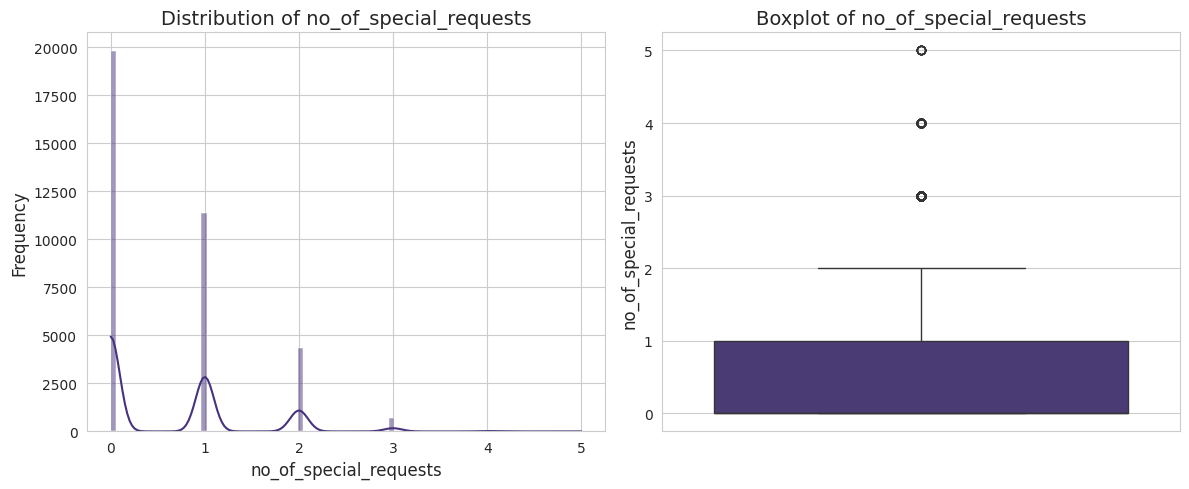

count    36275.000000
mean         0.619655
std          0.786236
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: no_of_special_requests, dtype: float64




In [38]:
# Set global style for seaborn
sns.set_style("whitegrid")

# Define color palettes
num_palette = "viridis"
cat_palette = "Paired"

# Univariate Analysis for Numerical Features
numerical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                      'no_of_week_nights', 'lead_time', 'arrival_year',
                      'arrival_month', 'arrival_date', 'repeated_guest',
                      'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room', 'no_of_special_requests']

for col in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create subplots for histogram and boxplot

    # Histogram
    # Use a single color from the 'viridis' colormap
    sns.histplot(df[col], kde=True, ax=axes[0], color=sns.color_palette(num_palette)[0])
    axes[0].set_title(f'Distribution of {col}', fontsize=14)
    axes[0].set_xlabel(col, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # Boxplot
    sns.boxplot(y=df[col], ax=axes[1], color=sns.color_palette(num_palette)[0])  # Use same color
    axes[1].set_title(f'Boxplot of {col}', fontsize=14)
    axes[1].set_ylabel(col, fontsize=12)

    plt.tight_layout()  # Adjust subplot spacing
    plt.show()

    print(df[col].describe())
    print("\n")

### **Categorical Features Analysis**

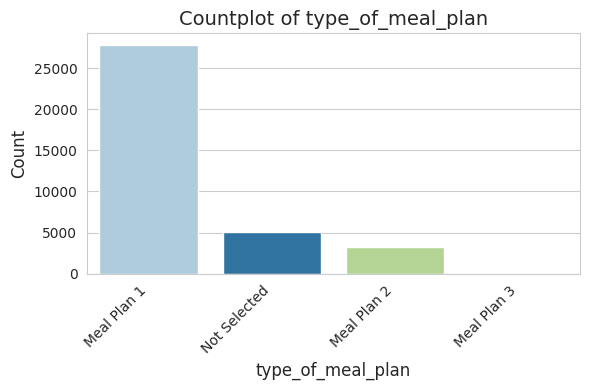

type_of_meal_plan
Meal Plan 1     76.733287
Not Selected    14.141971
Meal Plan 2      9.110958
Meal Plan 3      0.013784
Name: proportion, dtype: float64




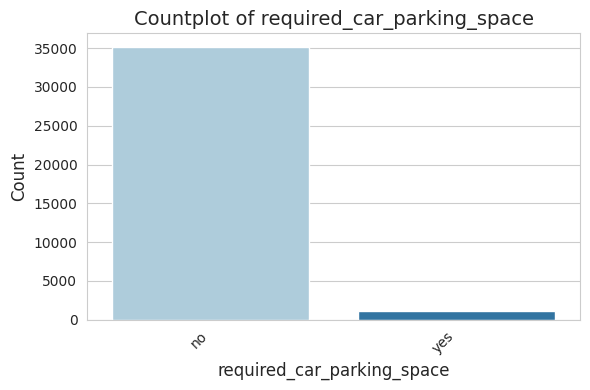

required_car_parking_space
no     96.901447
yes     3.098553
Name: proportion, dtype: float64




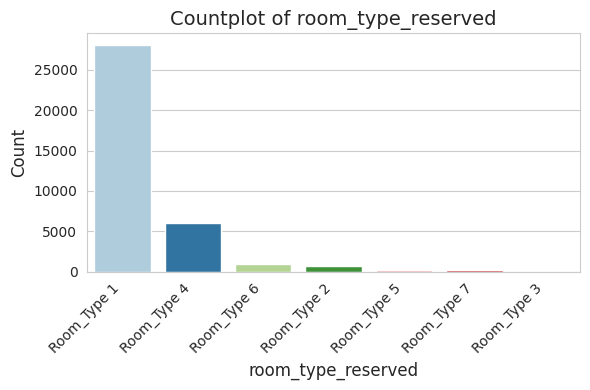

room_type_reserved
Room_Type 1    77.546520
Room_Type 4    16.697450
Room_Type 6     2.662991
Room_Type 2     1.907650
Room_Type 5     0.730531
Room_Type 7     0.435562
Room_Type 3     0.019297
Name: proportion, dtype: float64




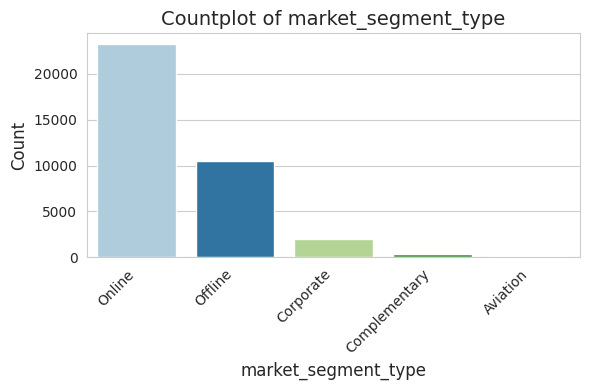

market_segment_type
Online           63.994487
Offline          29.022743
Corporate         5.560303
Complementary     1.077877
Aviation          0.344590
Name: proportion, dtype: float64




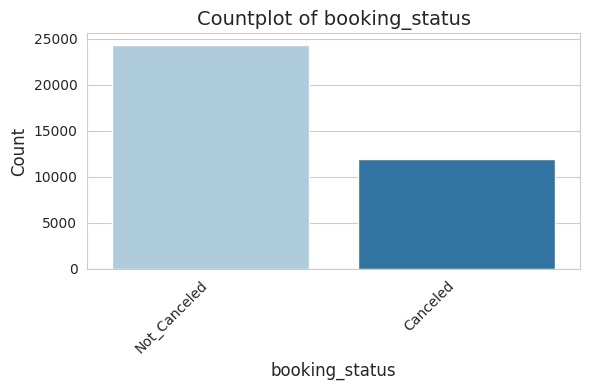

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64




In [39]:
# Set global style for seaborn
sns.set_style("whitegrid")

# Define color palettes
num_palette = "viridis"
cat_palette = "Paired"

# Univariate Analysis for Categorical Features
categorical_features = ['type_of_meal_plan', 'required_car_parking_space',
                        'room_type_reserved', 'market_segment_type', 'booking_status']

for col in categorical_features:
    plt.figure(figsize=(6, 4))

    # Get the number of unique categories in the column
    num_categories = len(df[col].unique())

    # Get a list of colors from the palette
    colors = sns.color_palette(cat_palette, n_colors=num_categories)

    # Use the colors in the countplot
    sns.countplot(x=df[col], palette=colors, order=df[col].value_counts().index)
    plt.title(f'Countplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()

    print(df[col].value_counts(normalize=True) * 100)
    print("\n")

In [40]:
free_rooms_price = df[df['avg_price_per_room'] == 0].shape[0]
print(f"Number of bookings with zero price (potential free rooms): {free_rooms_price}")

Number of bookings with zero price (potential free rooms): 545


## **Bivariate Analysis**

### **Heatmap**

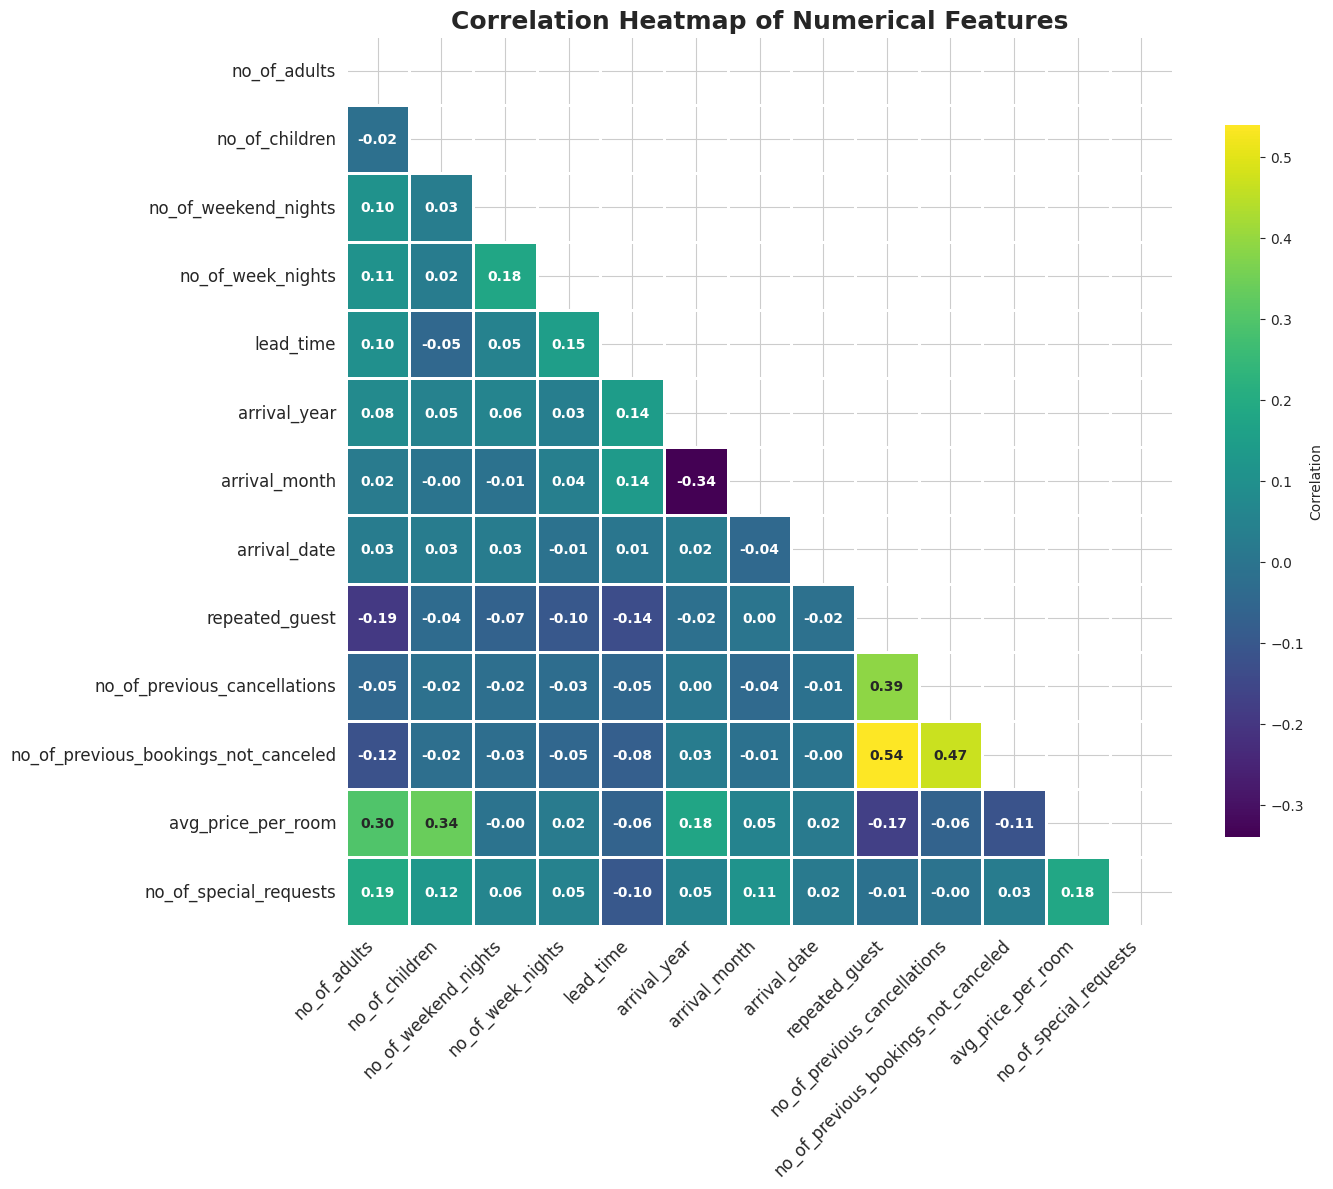

In [33]:
numerical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                      'no_of_week_nights', 'lead_time', 'arrival_year',
                      'arrival_month', 'arrival_date', 'repeated_guest',
                      'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room', 'no_of_special_requests']

correlation_matrix = df[numerical_features].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Customize the heatmap
plt.figure(figsize=(14, 12))  # Increased figure size for better readability
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='viridis', fmt=".2f",
            linewidths=1, linecolor='white',  # Added white lines between cells
            cbar_kws={"shrink": 0.8, "label": "Correlation"},  # Adjusted colorbar
            annot_kws={"size": 10, "weight": "bold"})  # Customized annotations

plt.title('Correlation Heatmap of Numerical Features', fontsize=18, fontweight="bold")
plt.xticks(rotation=45, ha='right', fontsize=12)  # Rotated x-axis labels
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

### **Pairplot**

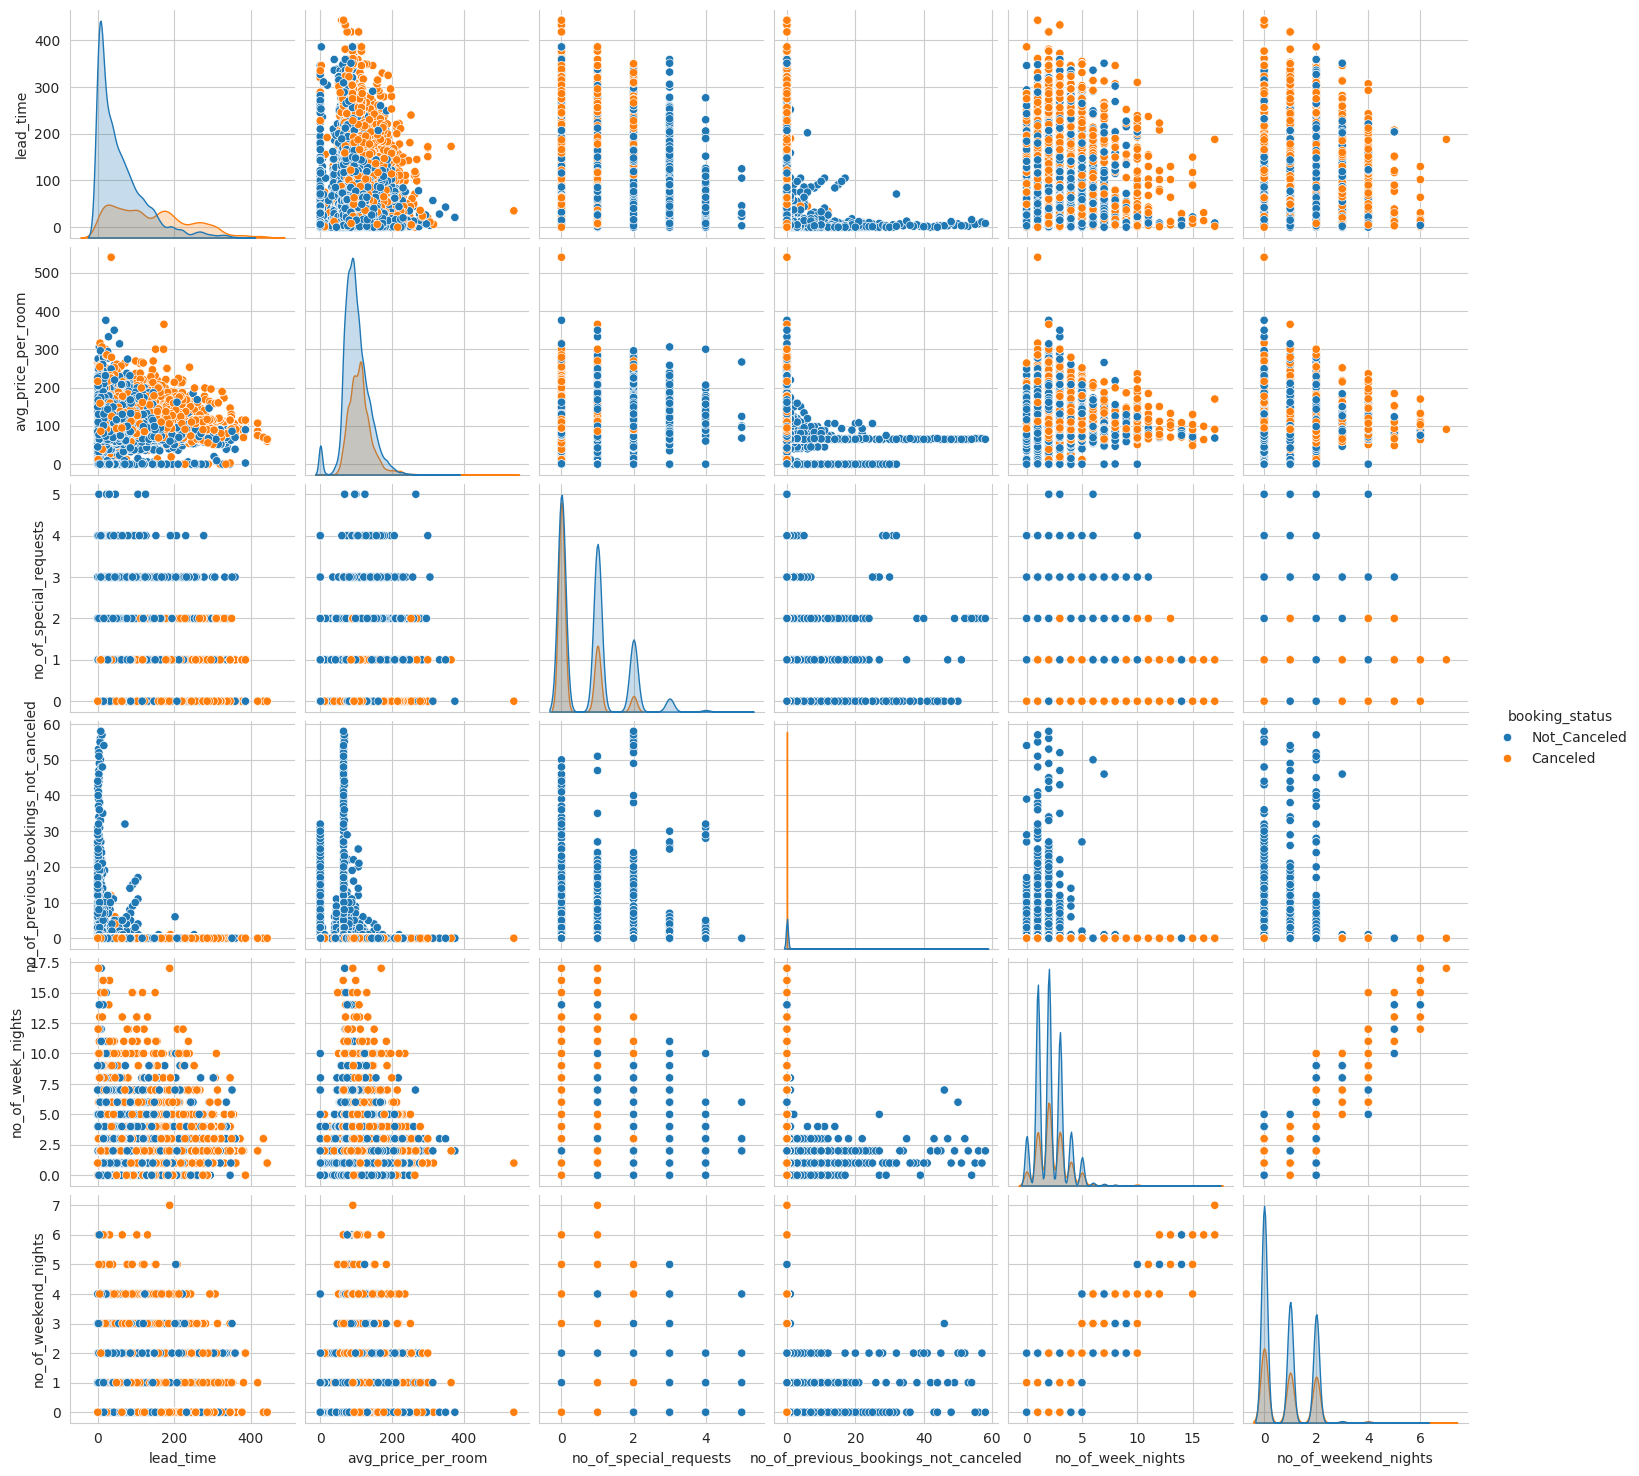

In [34]:
selected_numerical_features = ['lead_time', 'avg_price_per_room', 'no_of_special_requests',
                                 'no_of_previous_bookings_not_canceled', 'no_of_week_nights',
                                 'no_of_weekend_nights']

sns.pairplot(df[selected_numerical_features + ['booking_status']], hue='booking_status', diag_kind='kde')
plt.show()

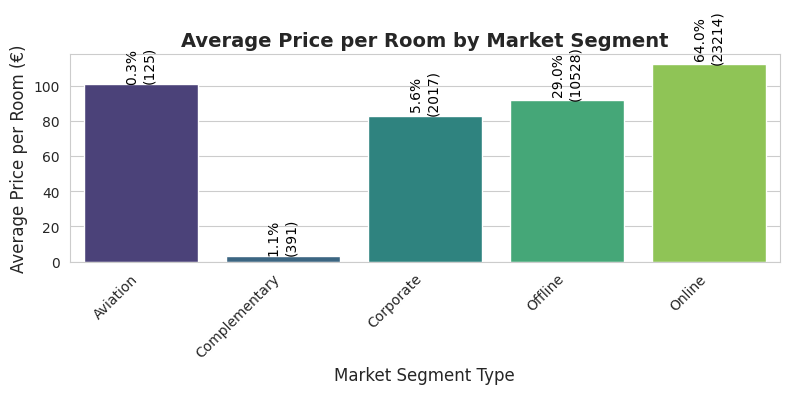

mean  count  percentage
market_segment_type                               
Aviation             100.704000    125    0.344590
Complementary          3.141765    391    1.077877
Corporate             82.911740   2017    5.560303
Offline               91.632679  10528   29.022743
Online               112.256855  23214   63.994487

In [35]:
avg_price_by_segment = df.groupby('market_segment_type')['avg_price_per_room'].agg(['mean', 'count'])
avg_price_by_segment['percentage'] = (avg_price_by_segment['count'] / avg_price_by_segment['count'].sum()) * 100

# Create the plot
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=avg_price_by_segment.index, y=avg_price_by_segment['mean'], palette='viridis')

# Add percentage labels on top of each bar
for p, percentage, count in zip(ax.patches, avg_price_by_segment['percentage'], avg_price_by_segment['count']):
    height = p.get_height()
    ax.annotate(f'{percentage:.1f}% \n({count})', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10, color='black', rotation=90)

# Customize the plot
plt.xlabel('Market Segment Type', fontsize=12)
plt.ylabel('Average Price per Room (‚Ç¨)', fontsize=12)
plt.title('Average Price per Room by Market Segment', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Print the table for better readability
avg_price_by_segment

In [41]:
# Calculate the overall cancellation percentage
overall_cancellation_percentage = (df['booking_status'].value_counts(normalize=True)['Canceled'] * 100)

# Calculate the cancellation percentage for repeating guests
repeating_guest_cancellation_percentage = (df[df['repeated_guest'] == 1]['booking_status'].value_counts(normalize=True)['Canceled'] * 100)

data = pd.DataFrame({'Guest Type': ['All Guests', 'Repeating Guests'],
                     'Cancellation Rate': [overall_cancellation_percentage, repeating_guest_cancellation_percentage]})

# Apply styling to the table
styled_table = data.style.background_gradient(cmap='viridis', subset=['Cancellation Rate']) \
                        .format({'Cancellation Rate': '{:.2f}%'}) \
                        .set_properties(**{'font-size': '12pt', 'text-align': 'center'})

# Display the table
styled_table

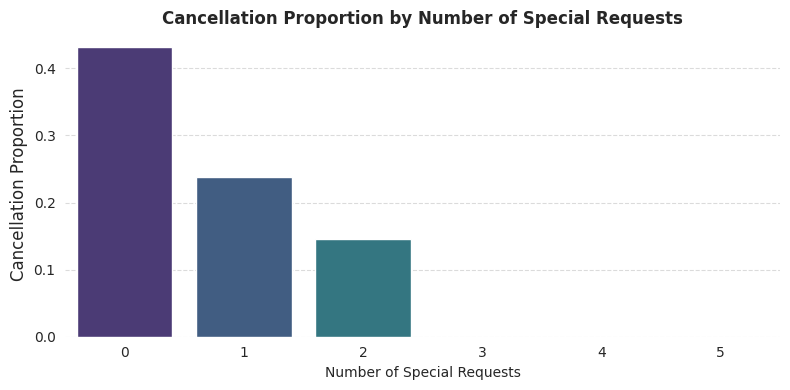

In [42]:
special_requests_counts = df.groupby(['no_of_special_requests', 'booking_status'])['booking_status'].count().unstack()

# Calculate cancellation proportions for each number of special requests
special_requests_counts['Cancellation_Proportion'] = special_requests_counts['Canceled'] / (special_requests_counts['Canceled'] + special_requests_counts['Not_Canceled'])

# Reset index for plotting
special_requests_counts = special_requests_counts.reset_index()

# Create the grouped bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='no_of_special_requests', y='Cancellation_Proportion', data=special_requests_counts, palette='viridis')
plt.title('Cancellation Proportion by Number of Special Requests', fontsize=12, fontweight='bold')
plt.xlabel('Number of Special Requests', fontsize=10)
plt.ylabel('Cancellation Proportion', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

# **Data Preprocessing**

In [44]:
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column', 'Missing Values']
missing_values['Percentage'] = (missing_values['Missing Values'] / len(df)) * 100
missing_values

Column  Missing Values  Percentage
0                           no_of_adults               0         0.0
1                         no_of_children               0         0.0
2                   no_of_weekend_nights               0         0.0
3                      no_of_week_nights               0         0.0
4                      type_of_meal_plan               0         0.0
5             required_car_parking_space               0         0.0
6                     room_type_reserved               0         0.0
7                              lead_time               0         0.0
8                           arrival_year               0         0.0
9                          arrival_month               0         0.0
10                          arrival_date               0         0.0
11                   market_segment_type               0         0.0
12                        repeated_guest               0         0.0
13          no_of_previous_cancellations               0         0.0
14  no_of_previous_bookings_not_canceled               0         0.0
15                    avg_price_per_room               0         0.0
16                no_of_special_requests               0         0.0
17                        booking_status               0         0.0

**There are no missing values**


In [45]:
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

preparing data for further analysis

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

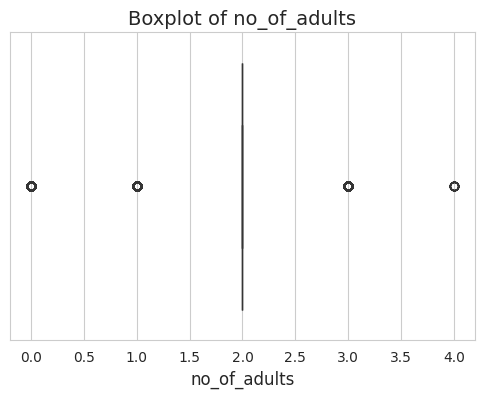

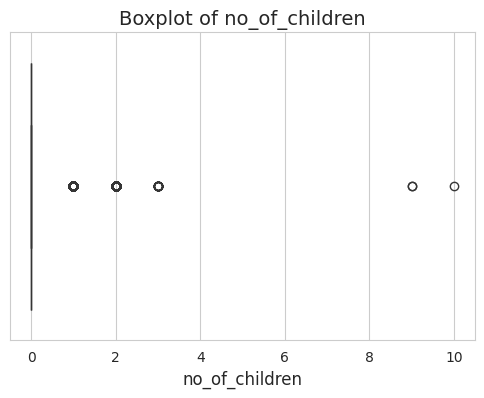

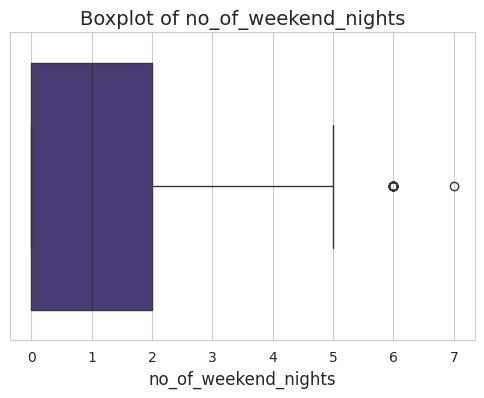

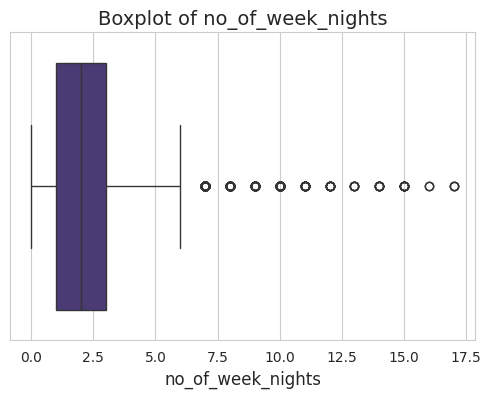

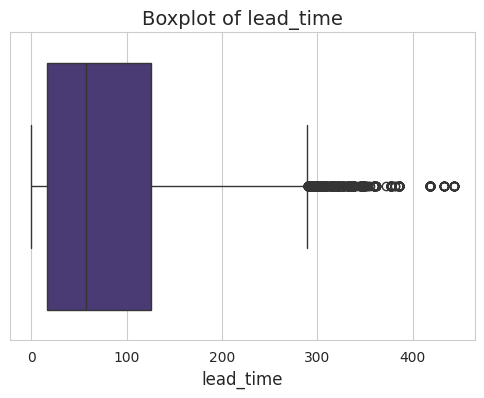

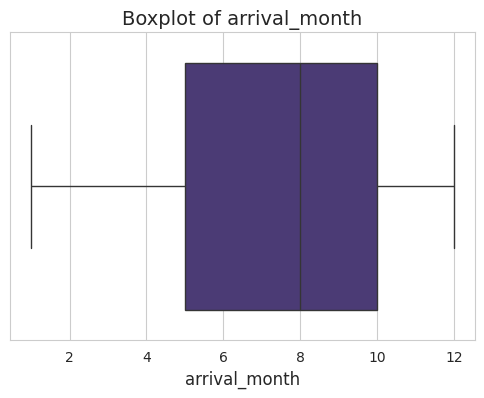

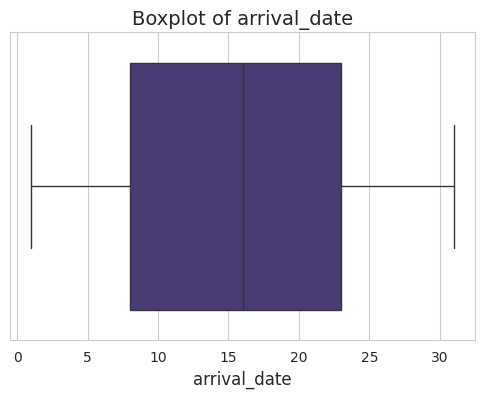

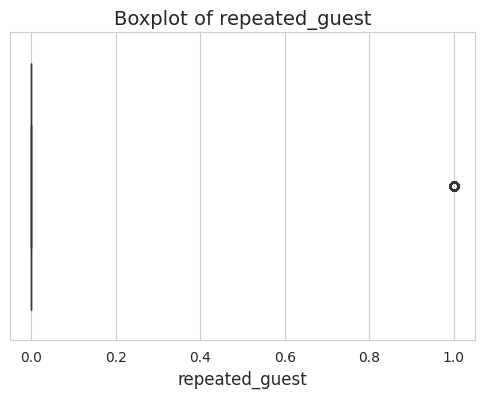

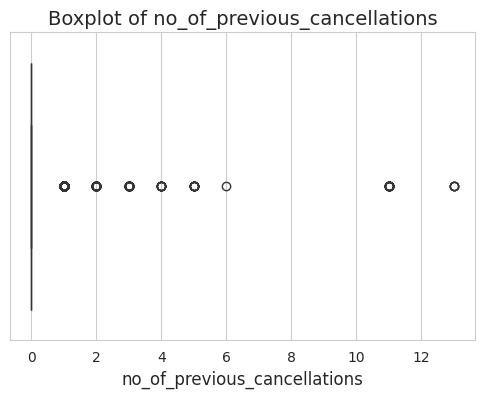

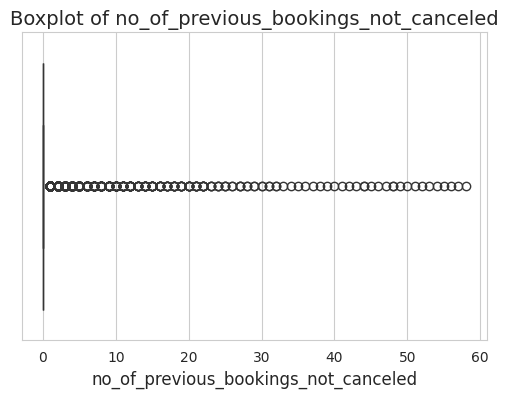

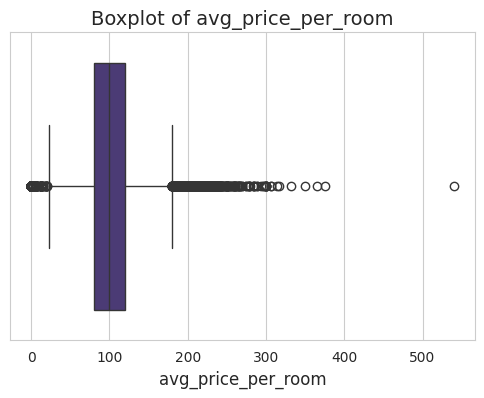

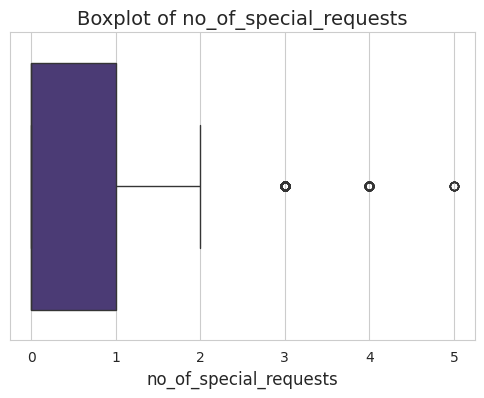

In [47]:

numerical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
                      'no_of_week_nights', 'lead_time',
                      'arrival_month', 'arrival_date', 'repeated_guest',
                      'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                      'avg_price_per_room', 'no_of_special_requests']

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color=sns.color_palette("viridis")[0]) # Use a single color from the viridis palette
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.show()

**General Observations:**

**Data Distribution:** Most of the variables appear to have some level of skewness (deviation from a normal distribution), which is common in real-world data.

**Outliers:** Several variables exhibit outliers, indicated by the points plotted outside the "whiskers" of the boxplots. The whiskers typically extend to 1.5 times the interquartile range (IQR) from the box.

***Lead time seems to have significant outliers and also avg price per room has outlier.***

In [50]:
df.shape

(36275, 18)

***Create a copy of the original data from for furhter data analysis***

In [49]:
df2=df.copy()

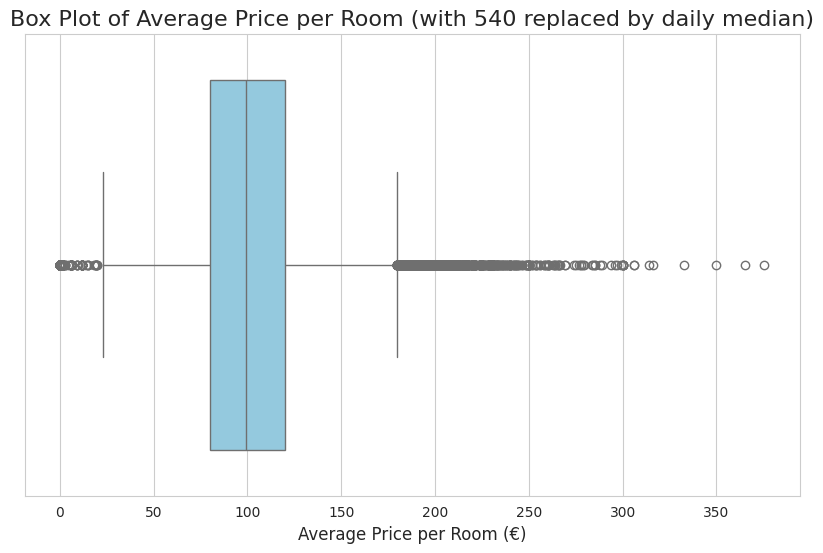

In [50]:
# Calculate the median for each month, year, and day
median_prices = df2.groupby(['arrival_month', 'arrival_year', 'arrival_date'])['avg_price_per_room'].transform('median')

# Replace only the single outlier value 540 with the corresponding month-year-day median
df2['avg_price_per_room'] = np.where((df2['avg_price_per_room'] == 540) & (df2['avg_price_per_room'] == df2['avg_price_per_room'].max()),
                                    median_prices, df2['avg_price_per_room'])

# Generate the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='avg_price_per_room', data=df2, color='skyblue')  # Using original 'avg_price_per_room'
plt.title('Box Plot of Average Price per Room (with 540 replaced by daily median)', fontsize=16)
plt.xlabel('Average Price per Room (‚Ç¨)', fontsize=12)
plt.show()

In [51]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

***Replaced the extreme outlier 540 with median of average price on the same day, year, and month üê±***

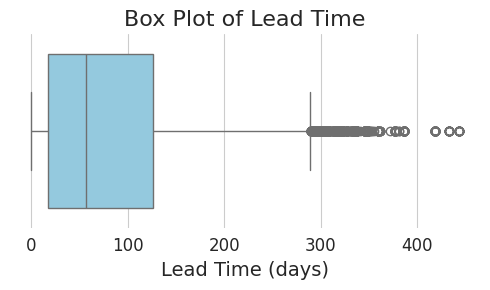

In [52]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=df2['lead_time'], color='skyblue')
plt.title('Box Plot of Lead Time', fontsize=16)
plt.xlabel('Lead Time (days)', fontsize=14)
plt.ylabel('')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

The lead time on this box plot seems to be from real world data and not an error. Since these long lead times represent real booking behaviors, preserving them is important for maintaining the integrity of your data and analysis.

In [53]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [54]:
df2.shape

(36275, 18)

In [55]:
df3 = df2.copy()

In [56]:
df3.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.411556  35.014471     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   
booking_status                        36275.0     0.327636   0.469358     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   375.5  
no_of_special_requests                   0.0     0.00     1.0     5.0  
booking_status                           0.0     0.00     1.0     1.0

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  object 
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

## **FEATURE ENGINEERING**

In [58]:
# Convert 'arrival_date' to datetime objects
df3['arrival_date'] = pd.to_datetime(df3['arrival_year'].astype(str) + '-' + df3['arrival_month'].astype(str) + '-' + df3['arrival_date'].astype(int).astype(str), errors='coerce')

# Drop rows with NaT values in 'arrival_date' (if any)
df3.dropna(subset=['arrival_date'], inplace=True)

# Now you can safely extract datetime features
df3['arrival_day_of_week'] = df3['arrival_date'].dt.dayofweek
df3['arrival_day_of_year'] = df3['arrival_date'].dt.dayofyear
df3['is_weekend'] = df3['arrival_day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
df3['arrival_week_of_year'] = df3['arrival_date'].dt.isocalendar().week
df3['is_month_start'] = df3['arrival_date'].dt.is_month_start.astype(int)
df3['is_month_end'] = df3['arrival_date'].dt.is_month_end.astype(int)
df3['quarter'] = df3['arrival_date'].dt.quarter

# 2. Lead Time Features:

def categorize_lead_time(lead_time):
    if lead_time <= 7:  # Very short lead time (within a week)
        return 'very_short'
    elif lead_time <= 30:
        return 'short'
    elif lead_time <= 90:
        return 'medium'
    elif lead_time <= 180:
        return 'long'
    elif lead_time <= 365:  # Very long lead time (within a year)
        return 'very_long'
    else:
        return 'extremely_long'  # Extremely long lead time (more than a year)

df3['lead_time_category'] = df3['lead_time'].apply(categorize_lead_time)  # Using 'lead_time' directly
df3['lead_time_weeks'] = df3['lead_time'] // 7
df3['lead_time_months'] = df3['lead_time'] // 30

# 3. Booking Composition Features:

df3['total_nights'] = df3['no_of_weekend_nights'] + df3['no_of_week_nights']
df3['has_children'] = df3['no_of_children'].apply(lambda x: 1 if x > 0 else 0)
df3['total_guests'] = df3['no_of_adults'] + df3['no_of_children']

def categorize_adults(no_of_adults):
    if no_of_adults == 1:
        return 'single'
    elif no_of_adults == 2:
        return 'couple'
    else:
        return 'group'

df3['no_of_adults_category'] = df3['no_of_adults'].apply(categorize_adults)

# 4. Room and Price Features:

df3['price_per_person'] = df3['avg_price_per_room'] / (df3['no_of_adults'] + df3['no_of_children'])
df3['price_per_person'] = df3['price_per_person'].replace(float('inf'), 0)  # Handle cases with 0 adults and 0 children
df3['total_price'] = df3['avg_price_per_room'] * df3['total_nights']

def categorize_price(price):
    if price < 50:
        return 'low'
    elif price < 150:
        return 'medium'
    else:
        return 'high'

df3['avg_price_per_room_category'] = df3['avg_price_per_room'].apply(categorize_price)

# 5. Previous Bookings and Cancellations:

df3['cancellation_rate'] = df3['no_of_previous_cancellations'] / (df3['no_of_previous_cancellations'] + df3['no_of_previous_bookings_not_canceled'])
df3['cancellation_rate'] = df3['cancellation_rate'].fillna(0)  # Handle cases with no previous bookings
df3['previous_bookings_total'] = df3['no_of_previous_cancellations'] + df3['no_of_previous_bookings_not_canceled']

# 6. Special Requests:

df3['has_special_requests'] = df3['no_of_special_requests'].apply(lambda x: 1 if x > 0 else 0)

# 7. Market Segment and Meal Plan:

# No specific feature engineering for meal plan, one-hot encoding will be used

# 8. Interaction Features:

df3['lead_time_x_total_nights'] = df3['lead_time'] * df3['total_nights']  # Using 'lead_time' directly
df3['market_segment_x_total_nights'] = df3['market_segment_type'].astype('str') + '_' + df3['total_nights'].astype('str')
df3['has_children_x_weekend'] = df3['has_children'] * df3['is_weekend']
df3['special_requests_x_total_nights'] = df3['no_of_special_requests'] * df3['total_nights']

In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 42 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  object        
 5   required_car_parking_space            36238 non-null  object        
 6   room_type_reserved                    36238 non-null  object        
 7   lead_time                             36238 non-null  int64         
 8   arrival_year                          36238 non-null  int64         
 9   arrival_month                         36238 non-null  int64         
 10  arr

In [60]:
# --- Encoding ---
df3 = pd.get_dummies(df3, columns=['arrival_month',
                                    'arrival_day_of_week',
                                    'lead_time_category',
                                    'market_segment_type',
                                    'type_of_meal_plan',
                                    'room_type_reserved',
                                    'no_of_adults_category',
                                    'quarter',
                                    'market_segment_x_total_nights',
                                    'avg_price_per_room_category'], drop_first=True)

In [61]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Columns: 149 entries, no_of_adults to avg_price_per_room_category_medium
dtypes: UInt32(1), bool(117), datetime64[ns](1), float64(4), int32(1), int64(24), object(1)
memory usage: 12.9+ MB


In [62]:
df3 = df3.drop(['arrival_year', 'arrival_date', 'lead_time', 'no_of_adults', 'avg_price_per_room'], axis=1)

In [63]:
# See all column names
print("Column names in df3:")
print(df3.columns)

# See detailed info (adjust max_cols if needed)
pd.options.display.max_info_columns = 200
df3.info()

Column names in df3:
Index(['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
       'required_car_parking_space', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'no_of_special_requests', 'booking_status', 'arrival_day_of_year',
       ...
       'market_segment_x_total_nights_Online_24',
       'market_segment_x_total_nights_Online_3',
       'market_segment_x_total_nights_Online_4',
       'market_segment_x_total_nights_Online_5',
       'market_segment_x_total_nights_Online_6',
       'market_segment_x_total_nights_Online_7',
       'market_segment_x_total_nights_Online_8',
       'market_segment_x_total_nights_Online_9',
       'avg_price_per_room_category_low',
       'avg_price_per_room_category_medium'],
      dtype='object', length=144)
<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 144 columns):
 #    Column                                          Non-Null Count  

In [64]:
print(df['required_car_parking_space'].unique())

['no' 'yes']


In [65]:
# Perform one-hot encoding on 'required_car_parking_space'
df3 = pd.get_dummies(df3, columns=['required_car_parking_space'], drop_first=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36238 entries, 0 to 36274
Data columns (total 144 columns):
 #    Column                                          Non-Null Count  Dtype  
---   ------                                          --------------  -----  
 0    no_of_children                                  36238 non-null  int64  
 1    no_of_weekend_nights                            36238 non-null  int64  
 2    no_of_week_nights                               36238 non-null  int64  
 3    repeated_guest                                  36238 non-null  int64  
 4    no_of_previous_cancellations                    36238 non-null  int64  
 5    no_of_previous_bookings_not_canceled            36238 non-null  int64  
 6    no_of_special_requests                          36238 non-null  int64  
 7    booking_status                                  36238 non-null  int64  
 8    arrival_day_of_year                             36238 non-null  int32  
 9    is_weekend                     

In [77]:
df4 = df3.copy()

### **Data Scaling Considerations**
Given that we will be using Logistic Regression and KNN (both sensitive to feature scaling), and we have a mix of numerical features with potentially different scales, data scaling is highly recommended.

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df4.drop('booking_status', axis=1)
y = df4['booking_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Identify numerical features to scale (excluding one-hot encoded and binary features)
numerical_features = ['no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                     'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                     'no_of_special_requests', 'arrival_day_of_year', 'arrival_week_of_year',
                     'lead_time_weeks', 'lead_time_months', 'total_nights', 'total_guests',
                     'price_per_person', 'total_price', 'cancellation_rate',
                     'previous_bookings_total', 'lead_time_x_total_nights',
                     'special_requests_x_total_nights']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [79]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 28990 entries, 3932 to 15814
Data columns (total 143 columns):
 #    Column                                          Non-Null Count  Dtype  
---   ------                                          --------------  -----  
 0    no_of_children                                  28990 non-null  float64
 1    no_of_weekend_nights                            28990 non-null  float64
 2    no_of_week_nights                               28990 non-null  float64
 3    repeated_guest                                  28990 non-null  int64  
 4    no_of_previous_cancellations                    28990 non-null  float64
 5    no_of_previous_bookings_not_canceled            28990 non-null  float64
 6    no_of_special_requests                          28990 non-null  float64
 7    arrival_day_of_year                             28990 non-null  float64
 8    is_weekend                                      28990 non-null  int64  
 9    arrival_week_of_year        

# **Model Building**

### **Logistic Regression (statsmodels)**

Optimization terminated successfully.
         Current function value: 0.464517
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                28990
Model:                          Logit   Df Residuals:                    28966
Method:                           MLE   Df Model:                           23
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                  0.2665
Time:                        13:15:00   Log-Likelihood:                -13466.
converged:                       True   LL-Null:                       -18359.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.9701      0.

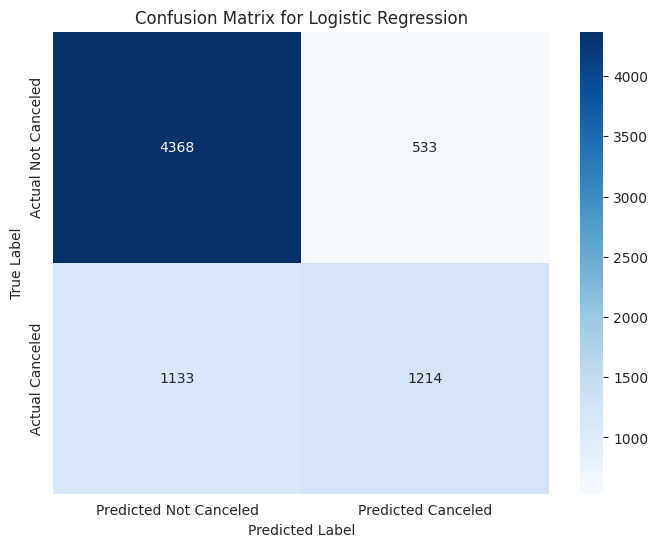

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      4901
           1       0.69      0.52      0.59      2347

    accuracy                           0.77      7248
   macro avg       0.74      0.70      0.72      7248
weighted avg       0.76      0.77      0.76      7248



In [80]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Select only numeric columns from X_train and X_test
X_train_sm = X_train.select_dtypes(include=np.number)
X_test_sm = X_test.select_dtypes(include=np.number)

# Add a constant to the features
X_train_sm = sm.add_constant(X_train_sm)
X_test_sm = sm.add_constant(X_test_sm)

# Create and fit the model
logit_model = sm.Logit(y_train, X_train_sm)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# Make predictions
y_pred_prob_logit = result.predict(X_test_sm)  # Predicted probabilities
y_pred_logit = (y_pred_prob_logit > 0.5).astype(int)  # Convert probabilities to 0/1

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_logit))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logit))
print(classification_report(y_test, y_pred_logit))

print("Accuracy:", accuracy_score(y_test, y_pred_logit))

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_logit)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Not Canceled', 'Actual Canceled'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_test, y_pred_logit))

## **KNN Classifier (sklearn):**

Accuracy: 0.8497516556291391


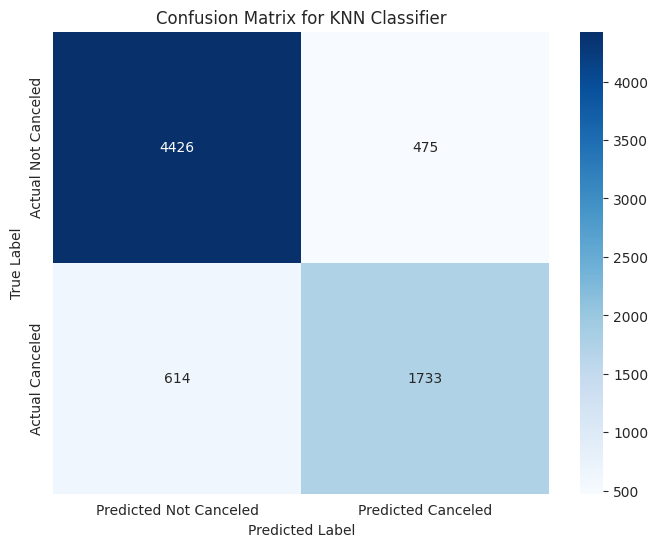

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      4901
           1       0.78      0.74      0.76      2347

    accuracy                           0.85      7248
   macro avg       0.83      0.82      0.83      7248
weighted avg       0.85      0.85      0.85      7248



In [81]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create a KNN classifier object (start with a default k, e.g., 5)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Not Canceled', 'Actual Canceled'])
plt.title("Confusion Matrix for KNN Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_test, y_pred_knn))

## **Naive Bayes Classifier (sklearn):**

Accuracy: 0.3969370860927152


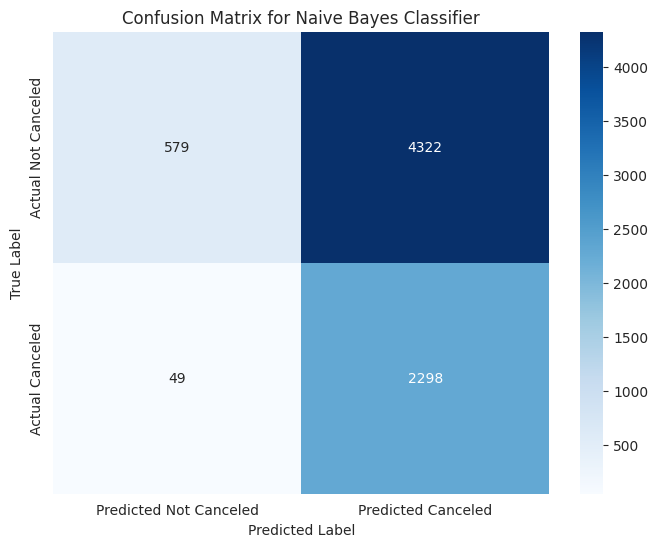

              precision    recall  f1-score   support

           0       0.92      0.12      0.21      4901
           1       0.35      0.98      0.51      2347

    accuracy                           0.40      7248
   macro avg       0.63      0.55      0.36      7248
weighted avg       0.74      0.40      0.31      7248



In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Gaussian Naive Bayes classifier object
nb_classifier = GaussianNB()

# Train the model
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))

# Create confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Not Canceled', 'Actual Canceled'])
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_test, y_pred_nb))

In [112]:
from IPython.display import Markdown

text = """
**<font color='red'>Based on the performance illustrated by this confusion matrix, I have decided not to proceed with the Naive Bayes classifier for our hotel booking cancellation prediction task. The model's tendency to significantly over-predict cancellations, as evidenced by the high number of false positives, would likely lead to negative business consequences, outweighing the benefits of its high recall for actual cancellations. Therefore, we will explore alternative modeling approaches that can achieve a more balanced and reliable performance.</font>**
"""
Markdown(text)


**<font color='red'>Based on the performance illustrated by this confusion matrix, I have decided not to proceed with the Naive Bayes classifier for our hotel booking cancellation prediction task. The model's tendency to significantly over-predict cancellations, as evidenced by the high number of false positives, would likely lead to negative business consequences, outweighing the benefits of its high recall for actual cancellations. Therefore, we will explore alternative modeling approaches that can achieve a more balanced and reliable performance.</font>**


Accuracy: 0.8678256070640177


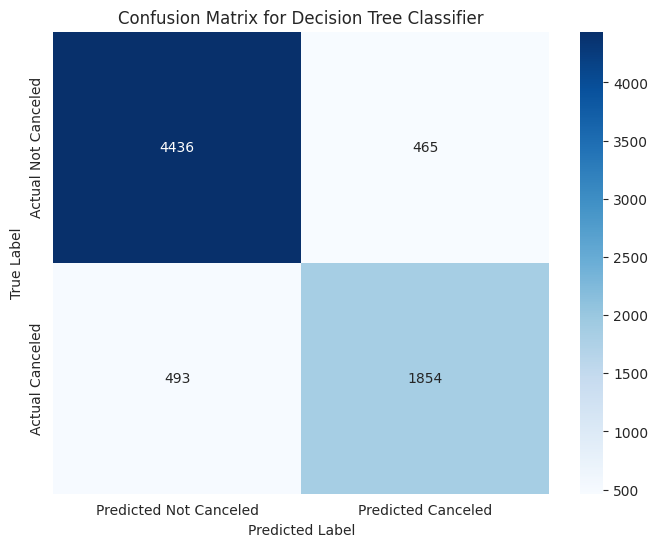

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      4901
           1       0.80      0.79      0.79      2347

    accuracy                           0.87      7248
   macro avg       0.85      0.85      0.85      7248
weighted avg       0.87      0.87      0.87      7248



In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

dt_classifier = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility

# Train the model
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

# Create confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Not Canceled', 'Actual Canceled'])
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_test, y_pred_dt))

# **Model Performance Improvement**

### **Logistic Regression**

1.   deal with multicollinearity,
2.   remove high p-value variables
3.   determine optimal threshold using ROC curve




In [84]:
X_train_numeric = X_train.select_dtypes(include=np.number)

X = add_constant(X_train_numeric)  # Add a constant for the intercept
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

    VIF Factor                              features
0          5.6                                 const
1          7.2                        no_of_children
2    1137596.9                  no_of_weekend_nights
3          inf                     no_of_week_nights
4          2.0                        repeated_guest
5          inf          no_of_previous_cancellations
6          inf  no_of_previous_bookings_not_canceled
7          7.7                no_of_special_requests
8         73.0                   arrival_day_of_year
9          1.2                            is_weekend
10        72.9                  arrival_week_of_year
11         1.0                        is_month_start
12         1.0                          is_month_end
13        99.6                       lead_time_weeks
14        97.7                      lead_time_months
15         inf                          total_nights
16         6.8                          has_children
17         4.7                          total_

In [85]:
X_train = X_train.drop(['previous_bookings_total', 'total_nights'], axis=1)

In [86]:
X_test = X_test.drop(['previous_bookings_total', 'total_nights'], axis=1)

In [87]:
X_train_numeric = X_train.select_dtypes(include=np.number)

X = add_constant(X_train_numeric)  # Add a constant for the intercept
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

    VIF Factor                              features
0          5.6                                 const
1          7.2                        no_of_children
2          2.9                  no_of_weekend_nights
3          5.8                     no_of_week_nights
4          2.0                        repeated_guest
5          1.8          no_of_previous_cancellations
6          1.9  no_of_previous_bookings_not_canceled
7          7.7                no_of_special_requests
8         73.0                   arrival_day_of_year
9          1.2                            is_weekend
10        72.9                  arrival_week_of_year
11         1.0                        is_month_start
12         1.0                          is_month_end
13        99.6                       lead_time_weeks
14        97.7                      lead_time_months
15         6.8                          has_children
16         4.7                          total_guests
17         3.3                      price_per_

In [88]:
X_train_copy = X_train.copy()
X_test_copy = X_test.copy()

In [89]:
X_train_numeric = X_train_copy.select_dtypes(include=np.number)

X = add_constant(X_train_numeric)  # Add a constant for the intercept
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

    VIF Factor                              features
0          5.6                                 const
1          7.2                        no_of_children
2          2.9                  no_of_weekend_nights
3          5.8                     no_of_week_nights
4          2.0                        repeated_guest
5          1.8          no_of_previous_cancellations
6          1.9  no_of_previous_bookings_not_canceled
7          7.7                no_of_special_requests
8         73.0                   arrival_day_of_year
9          1.2                            is_weekend
10        72.9                  arrival_week_of_year
11         1.0                        is_month_start
12         1.0                          is_month_end
13        99.6                       lead_time_weeks
14        97.7                      lead_time_months
15         6.8                          has_children
16         4.7                          total_guests
17         3.3                      price_per_

In [90]:
X_train_copy = X_train_copy.drop(['arrival_day_of_year', 'total_price', 'no_of_children'], axis=1)
X_test_copy = X_test_copy.drop(['arrival_day_of_year', 'total_price', 'no_of_children'], axis=1)

In [92]:
X_train_numeric = X_train_copy.select_dtypes(include=np.number)

X = add_constant(X_train_numeric)  # Add a constant for the intercept
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

    VIF Factor                              features
0          5.2                                 const
1          1.5                  no_of_weekend_nights
2          2.2                     no_of_week_nights
3          2.0                        repeated_guest
4          1.8          no_of_previous_cancellations
5          1.9  no_of_previous_bookings_not_canceled
6          7.6                no_of_special_requests
7          1.2                            is_weekend
8          1.0                  arrival_week_of_year
9          1.0                        is_month_start
10         1.0                          is_month_end
11        99.5                       lead_time_weeks
12        97.6                      lead_time_months
13         2.0                          has_children
14         2.4                          total_guests
15         1.5                      price_per_person
16         1.8                     cancellation_rate
17         4.0                  has_special_re

In [93]:
X_train_copy = X_train_copy.drop(['lead_time_weeks', 'lead_time_months'], axis=1)
X_test_copy = X_test_copy.drop(['lead_time_weeks', 'lead_time_months'], axis=1)

In [94]:
X_train_numeric = X_train_copy.select_dtypes(include=np.number)

X = add_constant(X_train_numeric)  # Add a constant for the intercept
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

    VIF Factor                              features
0          5.2                                 const
1          1.3                  no_of_weekend_nights
2          1.8                     no_of_week_nights
3          1.9                        repeated_guest
4          1.8          no_of_previous_cancellations
5          1.9  no_of_previous_bookings_not_canceled
6          7.6                no_of_special_requests
7          1.2                            is_weekend
8          1.0                  arrival_week_of_year
9          1.0                        is_month_start
10         1.0                          is_month_end
11         2.0                          has_children
12         2.3                          total_guests
13         1.5                      price_per_person
14         1.8                     cancellation_rate
15         4.0                  has_special_requests
16         1.5              lead_time_x_total_nights
17         1.5                has_children_x_w

In [95]:
X_train_copy = X_train_copy.drop(['special_requests_x_total_nights'], axis=1)
X_test_copy = X_test_copy.drop(['special_requests_x_total_nights'], axis=1)

### **Logistic Regression Model Improvement**

Optimization terminated successfully.
         Current function value: 0.497108
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                28990
Model:                          Logit   Df Residuals:                    28972
Method:                           MLE   Df Model:                           17
Date:                Sun, 19 Jan 2025   Pseudo R-squ.:                  0.2151
Time:                        13:18:00   Log-Likelihood:                -14411.
converged:                       True   LL-Null:                       -18359.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -0.8779      0.

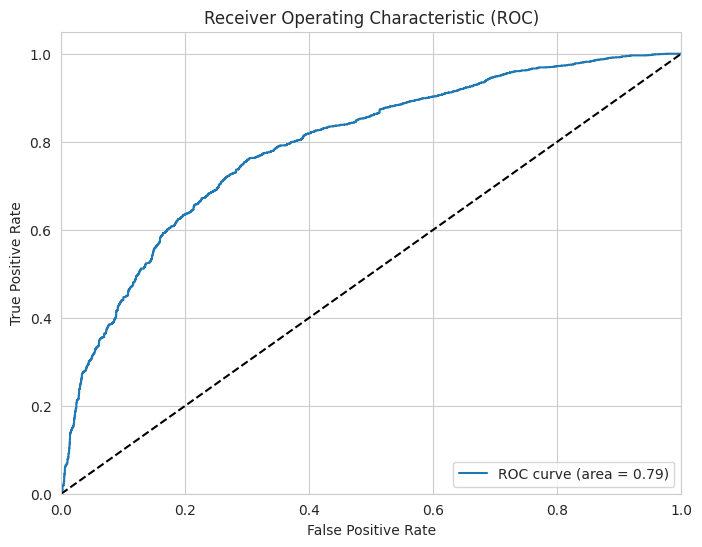

Optimal Threshold: 0.2958773744482887
Metrics with Optimal Threshold:
Accuracy: 0.7179911699779249
Confusion Matrix:
 [[3415 1486]
 [ 558 1789]]
              precision    recall  f1-score   support

           0       0.86      0.70      0.77      4901
           1       0.55      0.76      0.64      2347

    accuracy                           0.72      7248
   macro avg       0.70      0.73      0.70      7248
weighted avg       0.76      0.72      0.73      7248



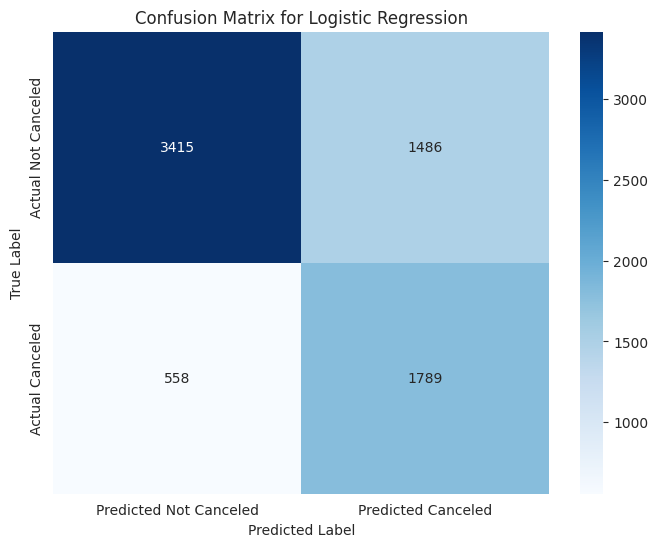

In [96]:
import statsmodels.api as sm
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Create copies of X_train and X_test for Logistic Regression
X_train_lr = X_train_copy.copy()
X_test_lr = X_test_copy.copy()

# Select only numeric columns
X_train_lr = X_train_lr.select_dtypes(include=np.number)
X_test_lr = X_test_lr.select_dtypes(include=np.number)

# Add a constant to the features for statsmodels
X_train_sm = sm.add_constant(X_train_lr, has_constant='skip')
X_test_sm = sm.add_constant(X_test_lr, has_constant='skip')

# Create and fit the logistic regression model
logit_model = sm.Logit(y_train, X_train_sm)  # Make sure y_train is also numerical (0/1)
result = logit_model.fit()

# Print the model summary
print(result.summary())

# --- Optimal Threshold Determination ---

# Make predictions
y_pred_prob_logit = result.predict(X_test_sm)  # Predicted probabilities
y_pred_logit = (y_pred_prob_logit > 0.5).astype(int)  # Convert probabilities to 0/1 predictions

# Evaluate the model
print("Initial Accuracy:", accuracy_score(y_test, y_pred_logit))
print("Initial Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logit))
print(classification_report(y_test, y_pred_logit))

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_logit)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Find optimal threshold using Youden's J statistic
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold:", optimal_threshold)

# Update predictions based on the optimal threshold
y_pred_logit_optimal = (y_pred_prob_logit > optimal_threshold).astype(int)

# Re-evaluate the model with the new threshold
print("Metrics with Optimal Threshold:")
print("Accuracy:", accuracy_score(y_test, y_pred_logit_optimal))
cm = confusion_matrix(y_test, y_pred_logit_optimal)
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred_logit_optimal))

# Visualize confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Not Canceled', 'Actual Canceled'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

***The initial logistic regression model suffered from severe multicollinearity, evidenced by extremely large standard errors and non-significant p-values for several variables, rendering the coefficients uninterpretable and the model unstable. After addressing multicollinearity by removing and combining highly correlated variables, the new model exhibits much more reasonable coefficient values and standard errors, along with a greater number of statistically significant predictors. While the overall accuracy remained similar (around 70-71%), the new model provides more reliable insights into the factors influencing booking cancellations, such as the strong negative impact of being a repeated guest and the positive association with longer lead times and higher prices. Importantly, the new model, due to its improved stability and interpretability, is much more useful for informing business decisions and developing effective strategies to mitigate the impact of hotel booking cancellations.***

### **Decision Tree** - pre pruning

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best hyperparameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8591335540838853
Decision Tree Confusion Matrix:
 [[4449  452]
 [ 569 1778]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      4901
           1       0.80      0.76      0.78      2347

    accuracy                           0.86      7248
   macro avg       0.84      0.83      0.84      7248
weighted avg       0.86      0.86      0.86      7248

Decision Tree AUC: 0.9123919911651639


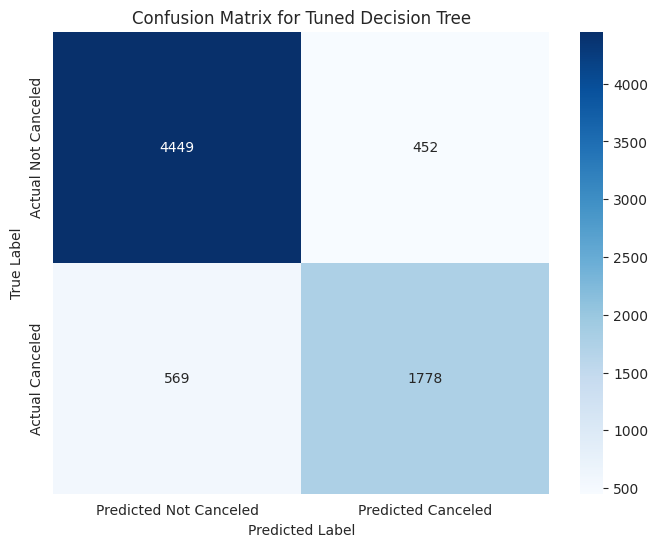


Feature Importances:
                                          feature  importance
15                       lead_time_x_total_nights    0.312024
42                     market_segment_type_Online    0.118653
12                               price_per_person    0.111689
14                           has_special_requests    0.066759
37                   lead_time_category_very_long    0.057284
..                                            ...         ...
77      market_segment_x_total_nights_Corporate_1    0.000000
76  market_segment_x_total_nights_Complementary_9    0.000000
75  market_segment_x_total_nights_Complementary_6    0.000000
74  market_segment_x_total_nights_Complementary_5    0.000000
82      market_segment_x_total_nights_Corporate_2    0.000000

[135 rows x 2 columns]


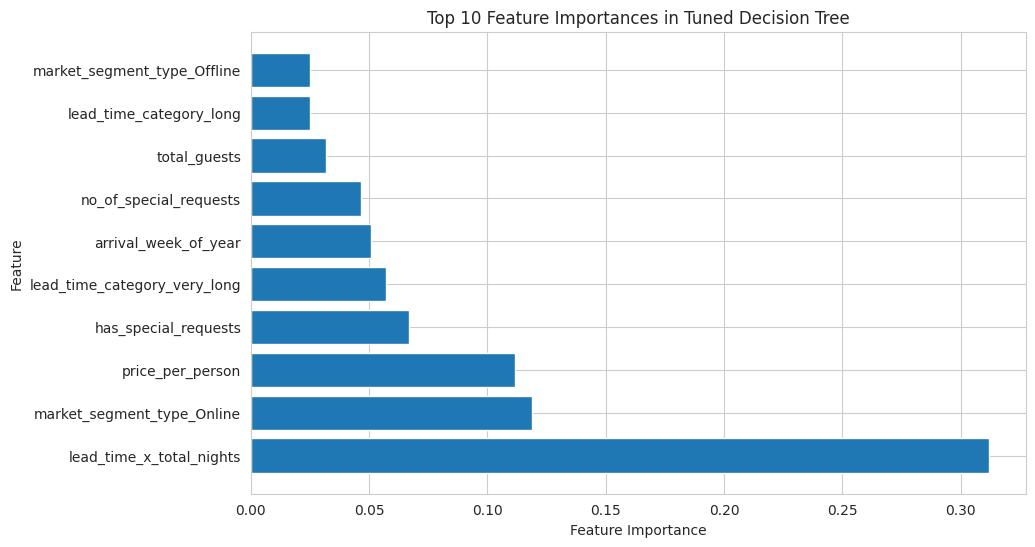

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Decision Tree classifier object
dt_classifier = DecisionTreeClassifier(random_state=42)  # Set random_state for reproducibility

# Define the parameter grid for pre-pruning
param_grid_dt = {
    'max_depth': [3, 5, 7, 10, None],  # Example values - adjust as needed
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],  # Or try fractions like 0.5, 0.7
    'criterion': ['gini', 'entropy']
}

# Create a GridSearchCV object
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV object to the training data (X_train_copy, y_train)
grid_search_dt.fit(X_train_copy, y_train)  # Use X_train_copy and y_train

# Print the best hyperparameters
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# Get the best Decision Tree model
best_dt = grid_search_dt.best_estimator_

# Make predictions with the best model
y_pred_dt = best_dt.predict(X_test_copy)  # Use X_test_copy

# Evaluate the best model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Calculate AUC
y_pred_prob_dt = best_dt.predict_proba(X_test_copy)[:, 1]  # Probability of class 1
print("Decision Tree AUC:", roc_auc_score(y_test, y_pred_prob_dt))

# Visualize confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Not Canceled', 'Actual Canceled'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Tuned Decision Tree")
plt.show()

# --- Feature Importances (Optional) ---
importances = best_dt.feature_importances_
feature_names = X_train_copy.columns  # Use X_train_copy.columns

# Create a dataframe for easy visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances['feature'][:10], feature_importances['importance'][:10])  # Plot top 10
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances in Tuned Decision Tree")
plt.show()

In [98]:
from IPython.display import HTML, display

text = """
<div style='color: blue;'>
    <b>The tuned Decision Tree model demonstrates strong predictive power for hotel booking cancellations, achieving an impressive 86.8% accuracy. Notably, the model highlights the crucial role of the interaction between lead time and stay duration (<code>lead_time_x_total_nights</code>) as the most significant predictor. The prominence of online bookings (<code>market_segment_type_Online</code>) and <code>price_per_person</code> further underscores the importance of booking channel and pricing in cancellation behavior. Additionally, the model effectively leverages information about special requests, both in their presence (<code>has_special_requests</code>) and quantity (<code>no_of_special_requests</code>), to enhance its predictions. The inclusion of lead time categories and arrival week also suggests that temporal factors contribute meaningfully to the model's accuracy. Overall, the Decision Tree model exhibits robust and well-balanced performance, providing valuable insights for understanding and predicting booking cancellations.</b>
</div>
"""

display(HTML(text))

### **KNN Classifier - Model Improvement**

## **K-Nearest Neighbors (KNN - 10% Data)**

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters for KNN: {'weights': 'distance', 'n_neighbors': 23}
Tuned KNN Accuracy: 0.8235375275938189
Tuned KNN Confusion Matrix:
 [[4521  380]
 [ 899 1448]]
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      4901
           1       0.79      0.62      0.69      2347

    accuracy                           0.82      7248
   macro avg       0.81      0.77      0.78      7248
weighted avg       0.82      0.82      0.82      7248

Tuned KNN AUC: 0.8775883498815534


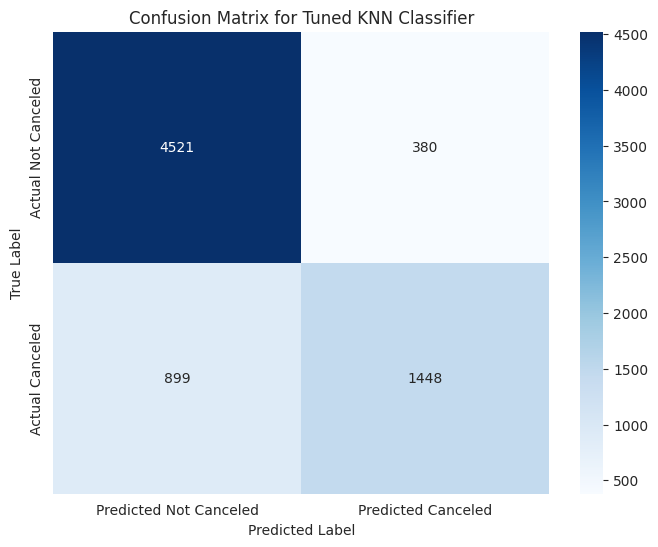

In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Define the parameter grid to search
param_grid = {
    'n_neighbors': np.arange(1, 30, 2),  # Check odd numbers from 1 to 29
    'weights': ['uniform', 'distance']
}

# Create a RandomizedSearchCV object
random_search_knn = RandomizedSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1, n_iter=20)

# Use a smaller subset of the training data
X_train_subset = X_train_copy.sample(frac=0.1, random_state=42)
y_train_subset = y_train.sample(frac=0.1, random_state=42)

# Fit the RandomizedSearchCV object to the subset of the training data
random_search_knn.fit(X_train_subset, y_train_subset)

# Print the best hyperparameters
print("Best hyperparameters for KNN:", random_search_knn.best_params_)

# Get the best KNN model
best_knn = random_search_knn.best_estimator_

# Make predictions with the best model
y_pred_knn = best_knn.predict(X_test_copy)

# Evaluate the best model
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Tuned KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Calculate AUC
y_pred_prob_knn = best_knn.predict_proba(X_test_copy)[:, 1]  # Probability of class 1
print("Tuned KNN AUC:", roc_auc_score(y_test, y_pred_prob_knn))

# Visualize confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Not Canceled', 'Actual Canceled'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Tuned KNN Classifier")
plt.show()

## **K-Nearest Neighbors (KNN - 30% Data)**

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best hyperparameters for KNN: {'algorithm': 'auto', 'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Tuned KNN Accuracy: 0.8331953642384106
Tuned KNN Confusion Matrix:
 [[4410  491]
 [ 718 1629]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      4901
           1       0.77      0.69      0.73      2347

    accuracy                           0.83      7248
   macro avg       0.81      0.80      0.80      7248
weighted avg       0.83      0.83      0.83      7248

Tuned KNN AUC: 0.8863041263458751


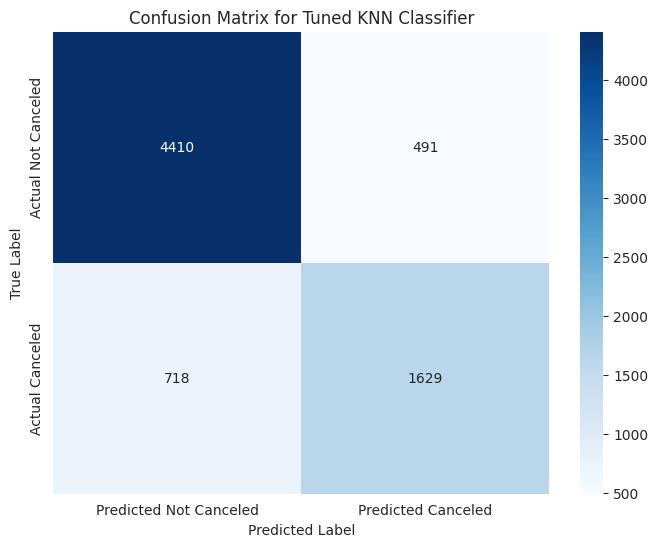

In [105]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a KNN classifier object
knn = KNeighborsClassifier()

# Define the simplified parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],  # Further reduced range of neighbors
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto'],
    'leaf_size': [20, 30]  # Further reduced range
}

# Create a GridSearchCV object with the simplified parameter grid
grid_search_knn = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

# Use a smaller subset of the training data (25% of the data)
X_train_subset = X_train_copy.sample(frac=0.25, random_state=42)
y_train_subset = y_train.sample(frac=0.25, random_state=42)

# Fit the GridSearchCV object to the subset of the training data
grid_search_knn.fit(X_train_subset, y_train_subset)

# Print the best hyperparameters
print("Best hyperparameters for KNN:", grid_search_knn.best_params_)

# Get the best KNN model
best_knn = grid_search_knn.best_estimator_

# Make predictions with the best model
y_pred_knn = best_knn.predict(X_test_copy)

# Evaluate the best model
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Tuned KNN Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

# Calculate AUC
y_pred_prob_knn = best_knn.predict_proba(X_test_copy)[:, 1]  # Probability of class 1
print("Tuned KNN AUC:", roc_auc_score(y_test, y_pred_prob_knn))

# Visualize confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted Not Canceled', 'Predicted Canceled'],
            yticklabels=['Actual Not Canceled', 'Actual Canceled'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Tuned KNN Classifier")
plt.show()

# **Model Performance Comparison and Final Model Selection**

# **Actionable Insights & Recommendations**